In [21]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

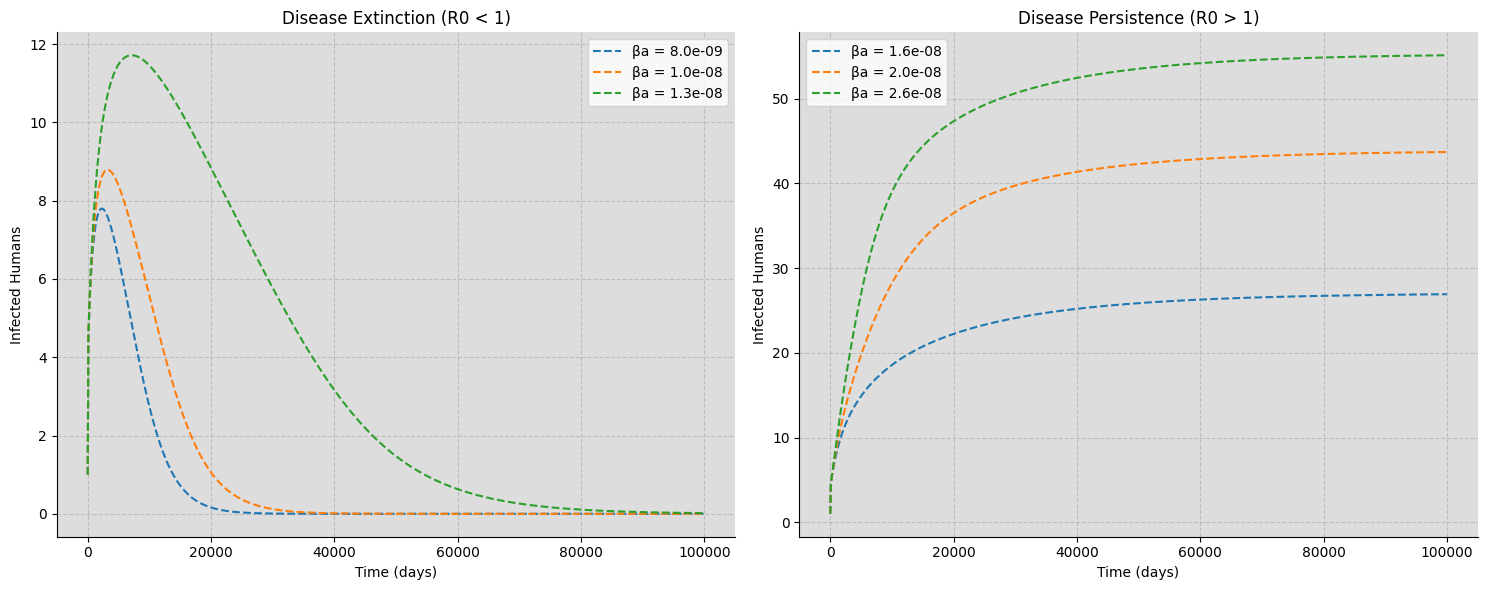

In [23]:
# Initial conditions
S_a0, I_a0 = 9900, 100  # Initial avian population
S_h0, I_h0, R_h0 = 9999, 1, 0  # Initial human population

# Time grid
t = np.linspace(0, 10e4, 1000)  # 1000 points instead of 100000 to match ret

# Parameters from the literature
r_a = 5e-3
K_a = 5e4
mu_a = 3.4246e-4
delta_a = 4e-4
Pi_h = 30
beta_h = 8e-7
mu_h = 3.91e-5
delta_h = 0.077
b = 0.001
c = 0.01
gamma = 0.1

# The model differential equations
def deriv(y, t, ra, Ka, mu_a, delta_a, Pi_h, beta_h, mu_h, delta_h, gamma, b, c, beta_a):
    S_a, I_a, S_h, I_h, R_h = y
    dS_a_dt = r_a * S_a * (1 - S_a / K_a) - (beta_a * I_a * S_a) / (1 + b * I_a)
    dI_a_dt = (beta_a * I_a * S_a) / (1 + b * I_a) - (mu_a + delta_a) * I_a
    dS_h_dt = Pi_h - (beta_h * I_a * S_h) / (1 + c * I_h**2) - mu_h * S_h
    dI_h_dt = (beta_h * I_a * S_h) / (1 + c * I_h**2) - (mu_h + delta_h + gamma) * I_h
    dR_h_dt = gamma * I_h - mu_h * R_h
    
    return dS_a_dt, dI_a_dt, dS_h_dt, dI_h_dt, dR_h_dt

# Initial conditions vector
y0 = S_a0, I_a0, S_h0, I_h0, R_h0

# Define βa values for each scenario
beta_a_values_1 = [0.8e-8, 1.0e-8, 1.3e-8]  # R0 < 1
beta_a_values_2 = [1.6e-8, 2.0e-8, 2.6e-8]  # R0 > 1

# Create two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6), facecolor='w')

# Function to run simulation and plot results
def run_and_plot(ax, beta_a_values, title):
    results = {}
    for beta_a in beta_a_values:
        ret = odeint(deriv, y0, t, args=(r_a, K_a, mu_a, delta_a, Pi_h, beta_h, mu_h, delta_h, gamma, b, c, beta_a))
        _, _, _, I_h, _ = ret.T
        ax.plot(t, I_h, linestyle='--', label=f'βa = {beta_a:.1e}')
        results[beta_a] = ret
    
    ax.set_xlabel('Time (days)')
    ax.set_ylabel('Infected Humans')
    ax.set_title(title)
    ax.legend()
    ax.grid(True, which='both', linestyle='--', alpha=0.7)
    ax.set_facecolor('#dddddd')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    return results

# Run simulations and plot results for R0 < 1
results_1 = run_and_plot(ax1, beta_a_values_1, 'Disease Extinction (R0 < 1)')

# Run simulations and plot results for R0 > 1
results_2 = run_and_plot(ax2, beta_a_values_2, 'Disease Persistence (R0 > 1)')

plt.tight_layout()
plt.show()

In [25]:
# Define beta_a
beta_a = 0.8e-8  # or whatever value you're using

# Run your simulation
ret = odeint(deriv, y0, t, args=(r_a, K_a, mu_a, delta_a, Pi_h, beta_h, mu_h, delta_h, gamma, b, c, beta_a))
S_a, I_a, S_h, I_h, R_h = ret.T

# Save the data
AVIAN_Data = np.column_stack((t, S_a, I_a, S_h, I_h, R_h))
np.savetxt(f"AVIAN_Influenza_beta_a_{beta_a:.1e}.csv", AVIAN_Data, delimiter=",", header="t,S_a,I_a,S_h,I_h,R_h", comments="")

In [27]:
# Load and check the saved data
loaded_data = np.genfromtxt('AVIAN_Influenza_beta_a_2.6e-08.csv', delimiter=',', skip_header=1)
print(loaded_data.shape)
print(loaded_data[:5])  # Print first 5 rows

(1000, 6)
[[0.00000000e+00 9.90000000e+03 1.00000000e+02 9.99900000e+03
  1.00000000e+00 0.00000000e+00]
 [1.00100100e+02 1.44664339e+04 9.55364644e+01 1.28809421e+04
  4.56601514e+00 4.09961478e+01]
 [2.00200200e+02 2.00837915e+04 9.23993810e+01 1.57410694e+04
  5.15895810e+00 8.94684561e+01]
 [3.00300300e+02 2.62689766e+04 9.06516321e+01 1.85800111e+04
  5.70943145e+00 1.43431277e+02]
 [4.00400400e+02 3.23008930e+04 9.02613781e+01 2.13982835e+04
  6.24730454e+00 2.02601458e+02]]


In [29]:
import torch
from torch.autograd import grad
import torch.nn as nn
from numpy import genfromtxt
import torch.optim as optim
import matplotlib.pyplot as plt
import torch.nn.functional as F

torch.manual_seed(1234) #set seed (optional)

In [31]:
avian_data = genfromtxt('AVIAN_Influenza_beta_a_2.6e-08.csv', delimiter=',') #in the form of [t, S_a, I_a, S_h, I_h, R_h]

In [33]:
class DINN(nn.Module):
    def __init__(self, t, S_a_data, I_a_data, S_h_data, I_h_data, R_h_data): # remember that the data was saved as [t, S_a, I_a, S_h, I_h, R_h]
        super(DINN, self).__init__()
        # here all the "loading the data" and training is happening
        pass

In [35]:
import numpy as np
from scipy import stats

class DINN(nn.Module):
    def __init__(self, t, S_a_data, I_a_data, S_h_data, I_h_data, R_h_data):
        super(DINN, self).__init__()
        
        self.epsilon = 1e-8
        
        # Convert input data to float32
        self.t = torch.tensor(t, dtype=torch.float32, requires_grad=True)
        self.t_float = self.t.float()
        self.t_batch = torch.reshape(self.t_float, (len(self.t),1))
        
        self.S_a = torch.tensor(S_a_data, dtype=torch.float32)
        self.I_a = torch.tensor(I_a_data, dtype=torch.float32)
        self.S_h = torch.tensor(S_h_data, dtype=torch.float32)
        self.I_h = torch.tensor(I_h_data, dtype=torch.float32)
        self.R_h = torch.tensor(R_h_data, dtype=torch.float32)  

        self.losses = [] # here I saved the model's losses per epoch
        
        #setting the parameters
        self.r_a_tilda = torch.nn.Parameter(torch.rand(1, requires_grad=True))
        self.K_a_tilda = torch.nn.Parameter(torch.rand(1, requires_grad=True))
        self.mu_a_tilda = torch.nn.Parameter(torch.rand(1, requires_grad=True))
        self.delta_a_tilda = torch.nn.Parameter(torch.rand(1, requires_grad=True))
        self.Pi_h_tilda = torch.nn.Parameter(torch.rand(1, requires_grad=True))
        self.beta_h_tilda = torch.nn.Parameter(torch.rand(1, requires_grad=True))
        self.beta_a_tilda = torch.nn.Parameter(torch.rand(1, requires_grad=True))
        self.mu_h_tilda = torch.nn.Parameter(torch.rand(1, requires_grad=True))
        self.delta_h_tilda = torch.nn.Parameter(torch.rand(1, requires_grad=True))
        self.b_tilda = torch.nn.Parameter(torch.rand(1, requires_grad=True))
        self.c_tilda = torch.nn.Parameter(torch.rand(1, requires_grad=True))
        self.gamma_tilda = torch.nn.Parameter(torch.rand(1, requires_grad=True))
        
        #find values for normalization
        self.S_a_max = max(self.S_a)
        self.I_a_max = max(self.I_a)
        self.S_h_max = max(self.S_h)
        self.I_h_max = max(self.I_h)
        self.R_h_max = max(self.R_h)
        self.S_a_min = min(self.S_a)
        self.I_a_min = min(self.I_a)
        self.S_h_min = min(self.S_h)
        self.I_h_min = min(self.I_h)
        self.R_h_min = min(self.R_h)  

        #normalize
        self.S_a_hat = (self.S_a - self.S_a_min) / (self.S_a_max - self.S_a_min + self.epsilon)
        self.I_a_hat = (self.I_a - self.I_a_min) / (self.I_a_max - self.I_a_min + self.epsilon)
        self.S_h_hat = (self.S_h - self.S_h_min) / (self.S_h_max - self.S_h_min + self.epsilon)
        self.I_h_hat = (self.I_h - self.I_h_min) / (self.I_h_max - self.I_h_min + self.epsilon)
        self.R_h_hat = (self.R_h - self.R_h_min) / (self.R_h_max - self.R_h_min + self.epsilon) 
          
        #matrices (x5 for S_a,I_a,S_h,I_h,R_h) for the gradients
        self.m1 = torch.zeros((len(self.t), 5)); self.m1[:, 0] = 1
        self.m2 = torch.zeros((len(self.t), 5)); self.m2[:, 1] = 1
        self.m3 = torch.zeros((len(self.t), 5)); self.m3[:, 2] = 1
        self.m4 = torch.zeros((len(self.t), 5)); self.m4[:, 3] = 1
        self.m5 = torch.zeros((len(self.t), 5)); self.m5[:, 4] = 1
      
        #NN
        self.net_si_sir = self.Net_si_sir()
        self.params = list(self.net_si_sir.parameters())
        self.params.extend(list([self.r_a_tilda, self.K_a_tilda, self.mu_a_tilda, self.delta_a_tilda, self.Pi_h_tilda, self.beta_h_tilda, self.beta_a_tilda, self.mu_h_tilda, self.delta_h_tilda, self.b_tilda, self.c_tilda, self.gamma_tilda]))
        
    #force parameters to be in the range of (-1, 1)

    @property
    def r_a(self):
        return torch.tanh(self.r_a_tilda) * 0.01 + 0.005  # Range: [0.0045, 0.0055]     

    @property
    def K_a(self):
        return torch.tanh(self.K_a_tilda) * 100000 + 50000  # Range: [0, 100000]     

    @property
    def mu_a(self):
        return torch.tanh(self.mu_a_tilda) * 0.0001 + 0.0003  # Range: [0.0002, 0.0004]     

    @property
    def delta_a(self):
        return torch.tanh(self.delta_a_tilda) * 0.0001 + 0.0004  # Range: [0.0003, 0.0005]     

    @property
    def Pi_h(self):
        return torch.tanh(self.Pi_h_tilda) * 100 + 30  # Range: [-70, 130]     

    @property
    def beta_h(self):
        return torch.tanh(self.beta_h_tilda) * 0.0000002 + 0.0000008  # Range: [0.0000006, 0.000001]     

    @property
    def beta_a(self):
        # Range to accommodate all beta_a values: [0.8e-8, 1.0e-8, 1.3e-8, 1.6e-8, 2.0e-8, 2.6e-8]
        return torch.tanh(self.beta_a_tilda) * 0.000000019 + 0.000000017  # Range: [0.8e-8, 2.6e-8]     

    @property
    def mu_h(self):
        return torch.tanh(self.mu_h_tilda) * 0.00001 + 0.000039  # Range: [0.000029, 0.000049]     

    @property
    def delta_h(self):
        return torch.tanh(self.delta_h_tilda) * 0.02 + 0.07  # Range: [0.05, 0.09]     

    @property
    def b(self):
        return torch.tanh(self.b_tilda) * 0.002 + 0.001  # Range: [-0.001, 0.003]     

    @property
    def c(self):
        return torch.tanh(self.c_tilda) * 0.02 + 0.01  # Range: [-0.01, 0.03]     

    @property
    def gamma(self):
        return torch.tanh(self.gamma_tilda) * 0.3 + 0.15  # Range: [-0.15, 0.45



    class Net_si_sir(nn.Module): # input = [[t1], [t2]...[t100]] -- that is, a batch of timesteps 
        def __init__(self):
            super(DINN.Net_si_sir, self).__init__()

            self.fc1=nn.Linear(1, 64) #takes 100 t's
            self.fc2=nn.Linear(64, 64)
            self.fc3=nn.Linear(64, 64)
            self.fc4=nn.Linear(64, 64)
            self.fc5=nn.Linear(64, 64)
            self.fc6=nn.Linear(64, 64)
            self.fc7=nn.Linear(64, 64)
            self.fc8=nn.Linear(64, 64)
            self.fc9=nn.Linear(64, 64)
            self.fc10=nn.Linear(64,64)
            self.fc11=nn.Linear(64, 64)
            self.fc12=nn.Linear(64, 64)
            self.out=nn.Linear(64, 5) #outputs S_a, I_a, S_h, I_h, R_h (100 S_a, 100 I_a, 100 S_h, 100 I_h, 100 R_h --- since we have a batch of 100 timesteps)

        def forward(self, t_batch):
            si_sir=F.relu(self.fc1(t_batch))
            si_sir=F.relu(self.fc2(si_sir))
            si_sir=F.relu(self.fc3(si_sir))
            si_sir=F.relu(self.fc4(si_sir))
            si_sir=F.relu(self.fc5(si_sir))
            si_sir=F.relu(self.fc6(si_sir))
            si_sir=F.relu(self.fc7(si_sir))
            si_sir=F.relu(self.fc8(si_sir))
            si_sir=F.relu(self.fc9(si_sir))
            si_sir=F.relu(self.fc10(si_sir))
            si_sir=F.relu(self.fc11(si_sir))
            si_sir=F.relu(self.fc12(si_sir))
            si_sir=self.out(si_sir)
            return si_sir
             
    def net_f(self, t_batch):
        
        #pass the timesteps batch to the neural network
        si_sir_hat = self.net_si_sir(t_batch)
        
        #organize S_a, I_a, S_h, I_h, R_h from the neural network's output -- note that these are normalized values -- hence the "hat" part
        S_a_hat, I_a_hat, S_h_hat, I_h_hat, R_h_hat = si_sir_hat[:,0], si_sir_hat[:,1], si_sir_hat[:,2], si_sir_hat[:,3], si_sir_hat[:,4]
        
        #S_a_t
        si_sir_hat.backward(self.m1, retain_graph=True)
        S_a_hat_t = self.t.grad.clone()
        self.t.grad.zero_()

        #I_a_t
        si_sir_hat.backward(self.m2, retain_graph=True)
        I_a_hat_t = self.t.grad.clone()
        self.t.grad.zero_()

        #S_h_t
        si_sir_hat.backward(self.m3, retain_graph=True)
        S_h_hat_t = self.t.grad.clone()
        self.t.grad.zero_()

        #I_h_t
        si_sir_hat.backward(self.m4, retain_graph=True)
        I_h_hat_t = self.t.grad.clone()
        self.t.grad.zero_()

        #R_h_t
        si_sir_hat.backward(self.m5, retain_graph=True)
        R_h_hat_t = self.t.grad.clone()
        self.t.grad.zero_()

        #unnormalize
        S_a = self.S_a_min + (self.S_a_max - self.S_a_min) * S_a_hat
        I_a = self.I_a_min + (self.I_a_max - self.I_a_min) * I_a_hat
        S_h = self.S_h_min + (self.S_h_max - self.S_h_min) * S_h_hat      
        I_h = self.I_h_min + (self.I_h_max - self.I_h_min) * I_h_hat
        R_h = self.R_h_min + (self.R_h_max - self.R_h_min) * R_h_hat
        
        f1_hat = S_a_hat_t - (self.r_a * S_a * (1 - S_a / (self.K_a + self.epsilon)) - (self.beta_a * I_a * S_a) / (1 + self.b * I_a + self.epsilon)) / (self.S_a_max - self.S_a_min + self.epsilon)
        f2_hat = I_a_hat_t - ((self.beta_a * I_a * S_a) / (1 + self.b * I_a + self.epsilon) - (self.mu_a + self.delta_a) * I_a) / (self.I_a_max - self.I_a_min + self.epsilon)
        f3_hat = S_h_hat_t - (self.Pi_h - (self.beta_h * I_a * S_h) / (1 + self.c * I_h**2 + self.epsilon) - self.mu_h * S_h) / (self.S_h_max - self.S_h_min + self.epsilon)
        f4_hat = I_h_hat_t - ((self.beta_h * I_a * S_h) / (1 + self.c * I_h**2 + self.epsilon) - (self.mu_h + self.delta_h + self.gamma) * I_h) / (self.I_h_max - self.I_h_min + self.epsilon)
        f5_hat = R_h_hat_t - (self.gamma * I_h - self.mu_h * R_h) / (self.R_h_max - self.R_h_min + self.epsilon)
        
        return f1_hat, f2_hat, f3_hat, f4_hat, f5_hat, S_a_hat, I_a_hat, S_h_hat, I_h_hat, R_h_hat

        
    def train(self, n_epochs):
        # train
        print('\nstarting training...\n')
        
        for epoch in range(n_epochs):
            # lists to hold the output (maintain only the final epoch)
            S_a_pred_list = []
            I_a_pred_list = []
            S_h_pred_list = []
            I_h_pred_list = []
            R_h_pred_list = []

            # we pass the timesteps batch into net_f
            f1, f2, f3, f4, f5, S_a_pred, I_a_pred, S_h_pred, I_h_pred, R_h_pred = self.net_f(self.t_batch) # net_f outputs f1_hat, f2_hat, f3_hat, f4_hat, f5_hat, S_a_hat, I_a_hat, S_h_hat, I_h_hat, R_h_hat 
                
            self.optimizer.zero_grad() #zero grad
                
            #append the values to plot later (note that we unnormalize them here for plotting)
            S_a_pred_list.append(self.S_a_min + (self.S_a_max - self.S_a_min) * S_a_pred)
            I_a_pred_list.append(self.I_a_min + (self.I_a_max - self.I_a_min) * I_a_pred)
            S_h_pred_list.append(self.S_h_min + (self.S_h_max - self.S_h_min) * S_h_pred)
            I_h_pred_list.append(self.I_h_min + (self.I_h_max - self.I_h_min) * I_h_pred)
            R_h_pred_list.append(self.R_h_min + (self.R_h_max - self.R_h_min) * R_h_pred)

            #calculate the loss --- MSE of the neural networks output and each compartment

            loss = (torch.mean(torch.square(self.S_a_hat - S_a_pred)) + 
                    torch.mean(torch.square(self.I_a_hat - I_a_pred)) + 
                    torch.mean(torch.square(self.S_h_hat - S_h_pred)) + 
                    torch.mean(torch.square(self.I_h_hat - I_h_pred)) + 
                    torch.mean(torch.square(self.R_h_hat - R_h_pred)) + 
                    torch.mean(torch.square(f1)) + 
                    torch.mean(torch.square(f2)) + 
                    torch.mean(torch.square(f3)) + 
                    torch.mean(torch.square(f4)) + 
                    torch.mean(torch.square(f5))
                    ) 
            # Backpropagation and optimization
            self.optimizer.zero_grad()
            loss.backward()
            self.optimizer.step()
            self.scheduler.step()

            # append the loss value (we call "loss.item()" because we just want the value of the loss and not the entire computational graph)
            self.losses.append(loss.item())

            if epoch % 1000 == 0:          
                print('\nEpoch ', epoch)

                print("Estimated parameters:")
                print(f"r_a: {dinn.r_a.item():.6f} (goal: 0.005000)")
                print(f"K_a: {dinn.K_a.item():.1f} (goal: 50000.0)")
                print(f"mu_a: {dinn.mu_a.item():.8f} (goal: 0.00034246)")
                print(f"delta_a: {dinn.delta_a.item():.7f} (goal: 0.0004000)")
                print(f"Pi_h: {dinn.Pi_h.item():.2f} (goal: 30.00)")
                print(f"beta_h: {dinn.beta_h.item():.10f} (goal: 0.0000008000)")
                print(f"beta_a: {dinn.beta_a.item():.11f} (goal: 0.000000026)")
                print(f"mu_h: {dinn.mu_h.item():.8f} (goal: 0.00003910)")
                print(f"delta_h: {dinn.delta_h.item():.6f} (goal: 0.077000)")
                print(f"b: {dinn.b.item():.6f} (goal: 0.001000)")
                print(f"c: {dinn.c.item():.5f} (goal: 0.01000)")
                print(f"gamma: {dinn.gamma.item():.5f} (goal: 0.10000)")

                print('#################################') 
                
        return S_a_pred_list, I_a_pred_list, S_h_pred_list, I_h_pred_list, R_h_pred_list

In [37]:
%%time
# avian_data = np.genfromtxt('AVIAN_Influenza_beta_a_2.6e-08.csv', delimiter=',', skip_header=1)
# dinn = DINN(avian_data[:, 0], avian_data[:, 1], avian_data[:, 2], avian_data[:, 3], avian_data[:, 4], avian_data[:, 5])
avian_data = np.genfromtxt('AVIAN_Influenza_beta_a_2.6e-08.csv', delimiter=',', skip_header=1).astype(np.float32)
dinn = DINN(avian_data[:, 0], avian_data[:, 1], avian_data[:, 2], avian_data[:, 3], avian_data[:, 4], avian_data[:, 5])

learning_rate = 1e-4
optimizer = optim.Adam(dinn.params, lr = learning_rate)
dinn.optimizer = optimizer

scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=1000, gamma=0.9)

dinn.scheduler = scheduler

#S_a_pred_list, I_a_pred_list, S_h_pred_list, I_h_pred_list, R_h_pred_list = dinn.train(50000) #train

S_a_pred_list, I_a_pred_list, S_h_pred_list, I_h_pred_list, R_h_pred_list = dinn.train(50000)


starting training...


Epoch  0
Estimated parameters:
r_a: 0.005289 (goal: 0.005000)
K_a: 88148.8 (goal: 50000.0)
mu_a: 0.00032541 (goal: 0.00034246)
delta_a: 0.0004351 (goal: 0.0004000)
Pi_h: 35.82 (goal: 30.00)
beta_h: 0.0000009209 (goal: 0.0000008000)
beta_a: 0.00000001798 (goal: 0.000000026)
mu_h: 0.00004337 (goal: 0.00003910)
delta_h: 0.081748 (goal: 0.077000)
b: 0.001640 (goal: 0.001000)
c: 0.02310 (goal: 0.01000)
gamma: 0.30305 (goal: 0.10000)
#################################

Epoch  1000
Estimated parameters:
r_a: 0.004296 (goal: 0.005000)
K_a: 78533.0 (goal: 50000.0)
mu_a: 0.00031699 (goal: 0.00034246)
delta_a: 0.0004272 (goal: 0.0004000)
Pi_h: 33.63 (goal: 30.00)
beta_h: 0.0000009334 (goal: 0.0000008000)
beta_a: 0.00000001988 (goal: 0.000000026)
mu_h: 0.00004252 (goal: 0.00003910)
delta_h: 0.080338 (goal: 0.077000)
b: 0.001450 (goal: 0.001000)
c: 0.02172 (goal: 0.01000)
gamma: 0.27944 (goal: 0.10000)
#################################

Epoch  2000
Estimated parameters:
r_a: 

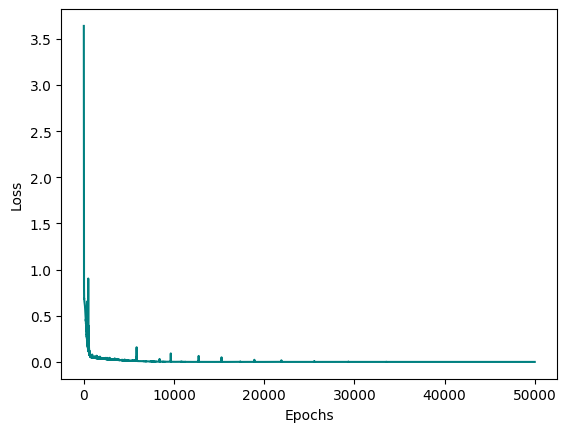

In [100]:
plt.plot(dinn.losses[0:], color = 'teal')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.savefig('Loss vs Epoch Graph for Parameter Estimation.png', dpi=300, bbox_inches='tight')

Loading data from AVIAN_Influenza_beta_a_8.0e-09.csv

starting training...


Epoch  0
Estimated parameters:
r_a: 0.005289 (goal: 0.005000)
K_a: 88148.8 (goal: 50000.0)
mu_a: 0.00032541 (goal: 0.00034246)
delta_a: 0.0004351 (goal: 0.0004000)
Pi_h: 35.82 (goal: 30.00)
beta_h: 0.0000009210 (goal: 0.0000008000)
beta_a: 0.00000000800 (goal: 0.000000026)
mu_h: 0.00003952 (goal: 0.00003910)
delta_h: 0.078732 (goal: 0.077000)
b: 0.002175 (goal: 0.001000)
c: 0.01639 (goal: 0.01000)
gamma: 0.34643 (goal: 0.10000)
#################################

Epoch  1000
Estimated parameters:
r_a: 0.004302 (goal: 0.005000)
K_a: 78671.7 (goal: 50000.0)
mu_a: 0.00032798 (goal: 0.00034246)
delta_a: 0.0004374 (goal: 0.0004000)
Pi_h: 34.86 (goal: 30.00)
beta_h: 0.0000009170 (goal: 0.0000008000)
beta_a: 0.00000000759 (goal: 0.000000026)
mu_h: 0.00003976 (goal: 0.00003910)
delta_h: 0.079158 (goal: 0.077000)
b: 0.002179 (goal: 0.001000)
c: 0.01647 (goal: 0.01000)
gamma: 0.35091 (goal: 0.10000)
#####################

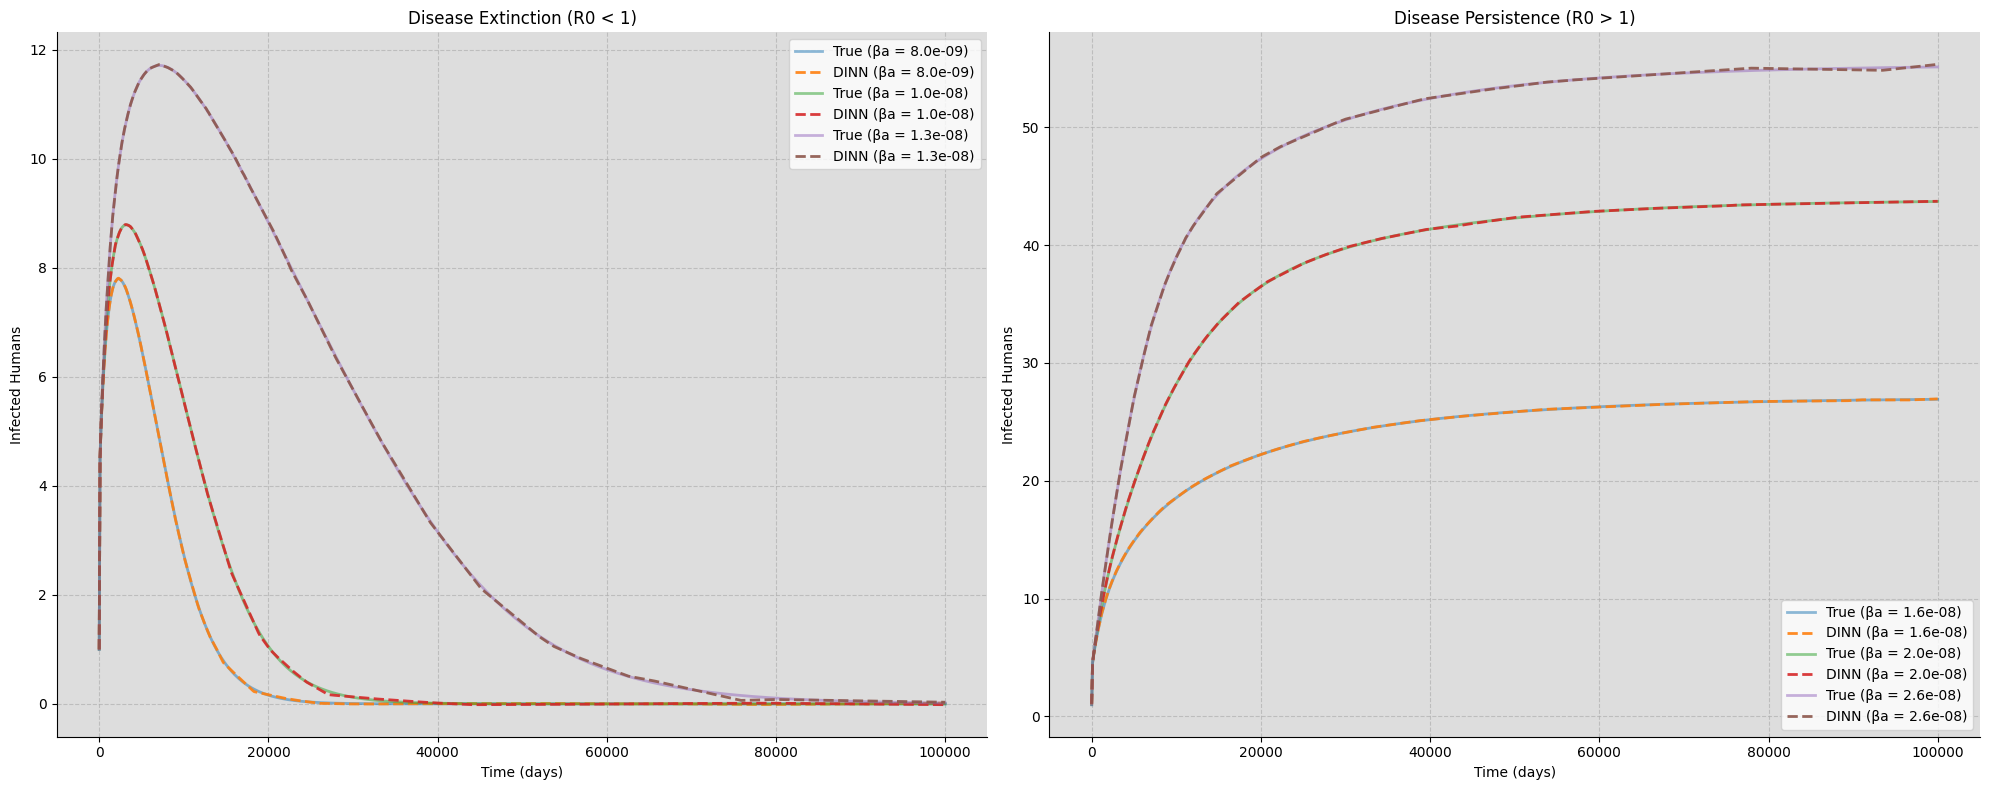

In [39]:
import numpy as np
from scipy import stats

class DINN(nn.Module):
    # def __init__(self, t, S_a_data, I_a_data, S_h_data, I_h_data, R_h_data):
        # super(DINN, self).__init__()
    def __init__(self, t, S_a_data, I_a_data, S_h_data, I_h_data, R_h_data, beta_a_init):
        super(DINN, self).__init__()
        
        self.epsilon = 1e-8
        
        # Convert input data to float32
        self.t = torch.tensor(t, dtype=torch.float32, requires_grad=True)
        self.t_float = self.t.float()
        self.t_batch = torch.reshape(self.t_float, (len(self.t),1))
        
        self.S_a = torch.tensor(S_a_data, dtype=torch.float32)
        self.I_a = torch.tensor(I_a_data, dtype=torch.float32)
        self.S_h = torch.tensor(S_h_data, dtype=torch.float32)
        self.I_h = torch.tensor(I_h_data, dtype=torch.float32)
        self.R_h = torch.tensor(R_h_data, dtype=torch.float32)

        self.losses = [] # here I saved the model's losses per epoch
        
        #setting the parameters
        self.r_a_tilda = torch.nn.Parameter(torch.rand(1, requires_grad=True))
        self.K_a_tilda = torch.nn.Parameter(torch.rand(1, requires_grad=True))
        self.mu_a_tilda = torch.nn.Parameter(torch.rand(1, requires_grad=True))
        self.delta_a_tilda = torch.nn.Parameter(torch.rand(1, requires_grad=True))
        self.Pi_h_tilda = torch.nn.Parameter(torch.rand(1, requires_grad=True))
        self.beta_h_tilda = torch.nn.Parameter(torch.rand(1, requires_grad=True))
        # self.beta_a_tilda = torch.nn.Parameter(torch.rand(1, requires_grad=True))
        self.beta_a_tilda = torch.nn.Parameter(torch.atanh((torch.tensor(beta_a_init) - 0.000000017) / 0.000000019), requires_grad=True)
        self.mu_h_tilda = torch.nn.Parameter(torch.rand(1, requires_grad=True))
        self.delta_h_tilda = torch.nn.Parameter(torch.rand(1, requires_grad=True))
        self.b_tilda = torch.nn.Parameter(torch.rand(1, requires_grad=True))
        self.c_tilda = torch.nn.Parameter(torch.rand(1, requires_grad=True))
        self.gamma_tilda = torch.nn.Parameter(torch.rand(1, requires_grad=True))
        
        #find values for normalization
        self.S_a_max = max(self.S_a)
        self.I_a_max = max(self.I_a)
        self.S_h_max = max(self.S_h)
        self.I_h_max = max(self.I_h)
        self.R_h_max = max(self.R_h)
        self.S_a_min = min(self.S_a)
        self.I_a_min = min(self.I_a)
        self.S_h_min = min(self.S_h)
        self.I_h_min = min(self.I_h)
        self.R_h_min = min(self.R_h)

        #normalize
        self.S_a_hat = (self.S_a - self.S_a_min) / (self.S_a_max - self.S_a_min + self.epsilon)
        self.I_a_hat = (self.I_a - self.I_a_min) / (self.I_a_max - self.I_a_min + self.epsilon)
        self.S_h_hat = (self.S_h - self.S_h_min) / (self.S_h_max - self.S_h_min + self.epsilon)
        self.I_h_hat = (self.I_h - self.I_h_min) / (self.I_h_max - self.I_h_min + self.epsilon)
        self.R_h_hat = (self.R_h - self.R_h_min) / (self.R_h_max - self.R_h_min + self.epsilon) 
        
        #matrices (x5 for S_a,I_a,S_h,I_h,R_h) for the gradients
        self.m1 = torch.zeros((len(self.t), 5)); self.m1[:, 0] = 1
        self.m2 = torch.zeros((len(self.t), 5)); self.m2[:, 1] = 1
        self.m3 = torch.zeros((len(self.t), 5)); self.m3[:, 2] = 1
        self.m4 = torch.zeros((len(self.t), 5)); self.m4[:, 3] = 1
        self.m5 = torch.zeros((len(self.t), 5)); self.m5[:, 4] = 1
        
        #NN
        self.net_si_sir = self.Net_si_sir()
        self.params = list(self.net_si_sir.parameters())
        self.params.extend(list([self.r_a_tilda, self.K_a_tilda, self.mu_a_tilda, self.delta_a_tilda, self.Pi_h_tilda, self.beta_h_tilda, self.beta_a_tilda, self.mu_h_tilda, self.delta_h_tilda, self.b_tilda, self.c_tilda, self.gamma_tilda]))
        
    #force parameters to be in the range of (-1, 1)

    @property
    def r_a(self):
        return torch.tanh(self.r_a_tilda) * 0.01 + 0.005  # Range: [0.0045, 0.0055]    

    @property
    def K_a(self):
        return torch.tanh(self.K_a_tilda) * 100000 + 50000  # Range: [0, 100000]    

    @property
    def mu_a(self):
        return torch.tanh(self.mu_a_tilda) * 0.0001 + 0.0003  # Range: [0.0002, 0.0004]    

    @property
    def delta_a(self):
        return torch.tanh(self.delta_a_tilda) * 0.0001 + 0.0004  # Range: [0.0003, 0.0005]    

    @property
    def Pi_h(self):
        return torch.tanh(self.Pi_h_tilda) * 100 + 30  # Range: [-70, 130]    

    @property
    def beta_h(self):
        return torch.tanh(self.beta_h_tilda) * 0.0000002 + 0.0000008  # Range: [0.0000006, 0.000001]    

    @property
    def beta_a(self):
        # Range to accommodate all beta_a values: [0.8e-8, 1.0e-8, 1.3e-8, 1.6e-8, 2.0e-8, 2.6e-8]
        return torch.tanh(self.beta_a_tilda) * 0.000000019 + 0.000000017  # Range: [0.8e-8, 2.6e-8]    

    @property
    def mu_h(self):
        return torch.tanh(self.mu_h_tilda) * 0.00001 + 0.000039  # Range: [0.000029, 0.000049]    

    @property
    def delta_h(self):
        return torch.tanh(self.delta_h_tilda) * 0.02 + 0.07  # Range: [0.05, 0.09]    

    @property
    def b(self):
        return torch.tanh(self.b_tilda) * 0.002 + 0.001  # Range: [-0.001, 0.003]    

    @property
    def c(self):
        return torch.tanh(self.c_tilda) * 0.02 + 0.01  # Range: [-0.01, 0.03]    

    @property
    def gamma(self):
        return torch.tanh(self.gamma_tilda) * 0.3 + 0.15  # Range: [-0.15, 0.45]



    class Net_si_sir(nn.Module): # input = [[t1], [t2]...[t100]] -- that is, a batch of timesteps 
        def __init__(self):
            super(DINN.Net_si_sir, self).__init__()

            self.fc1=nn.Linear(1, 64) #takes 100 t's
            self.fc2=nn.Linear(64, 64)
            self.fc3=nn.Linear(64, 64)
            self.fc4=nn.Linear(64, 64)
            self.fc5=nn.Linear(64, 64)
            self.fc6=nn.Linear(64, 64)
            self.fc7=nn.Linear(64, 64)
            self.fc8=nn.Linear(64, 64)
            self.fc9=nn.Linear(64, 64)
            self.fc10=nn.Linear(64,64)
            self.fc11=nn.Linear(64, 64)
            self.fc12=nn.Linear(64, 64)
            self.out=nn.Linear(64, 5) #outputs S_a, I_a, S_h, I_h, R_h (100 S_a, 100 I_a, 100 S_h, 100 I_h, 100 R_h --- since we have a batch of 100 timesteps)

        def forward(self, t_batch):
            si_sir=F.relu(self.fc1(t_batch))
            si_sir=F.relu(self.fc2(si_sir))
            si_sir=F.relu(self.fc3(si_sir))
            si_sir=F.relu(self.fc4(si_sir))
            si_sir=F.relu(self.fc5(si_sir))
            si_sir=F.relu(self.fc6(si_sir))
            si_sir=F.relu(self.fc7(si_sir))
            si_sir=F.relu(self.fc8(si_sir))
            si_sir=F.relu(self.fc9(si_sir))
            si_sir=F.relu(self.fc10(si_sir))
            si_sir=F.relu(self.fc11(si_sir))
            si_sir=F.relu(self.fc12(si_sir))
            si_sir=self.out(si_sir)
            return si_sir
            
    def net_f(self, t_batch):
        
        #pass the timesteps batch to the neural network
        si_sir_hat = self.net_si_sir(t_batch)
        
        #organize S_a, I_a, S_h, I_h, R_h from the neural network's output -- note that these are normalized values -- hence the "hat" part
        S_a_hat, I_a_hat, S_h_hat, I_h_hat, R_h_hat = si_sir_hat[:,0], si_sir_hat[:,1], si_sir_hat[:,2], si_sir_hat[:,3], si_sir_hat[:,4]
        
        #S_a_t
        si_sir_hat.backward(self.m1, retain_graph=True)
        S_a_hat_t = self.t.grad.clone()
        self.t.grad.zero_()

        #I_a_t
        si_sir_hat.backward(self.m2, retain_graph=True)
        I_a_hat_t = self.t.grad.clone()
        self.t.grad.zero_()

        #S_h_t
        si_sir_hat.backward(self.m3, retain_graph=True)
        S_h_hat_t = self.t.grad.clone()
        self.t.grad.zero_()

        #I_h_t
        si_sir_hat.backward(self.m4, retain_graph=True)
        I_h_hat_t = self.t.grad.clone()
        self.t.grad.zero_()

        #R_h_t
        si_sir_hat.backward(self.m5, retain_graph=True)
        R_h_hat_t = self.t.grad.clone()
        self.t.grad.zero_()

        #unnormalize
        S_a = self.S_a_min + (self.S_a_max - self.S_a_min) * S_a_hat
        I_a = self.I_a_min + (self.I_a_max - self.I_a_min) * I_a_hat
        S_h = self.S_h_min + (self.S_h_max - self.S_h_min) * S_h_hat      
        I_h = self.I_h_min + (self.I_h_max - self.I_h_min) * I_h_hat
        R_h = self.R_h_min + (self.R_h_max - self.R_h_min) * R_h_hat
        
        f1_hat = S_a_hat_t - (self.r_a * S_a * (1 - S_a / (self.K_a + self.epsilon)) - (self.beta_a * I_a * S_a) / (1 + self.b * I_a + self.epsilon)) / (self.S_a_max - self.S_a_min + self.epsilon)
        f2_hat = I_a_hat_t - ((self.beta_a * I_a * S_a) / (1 + self.b * I_a + self.epsilon) - (self.mu_a + self.delta_a) * I_a) / (self.I_a_max - self.I_a_min + self.epsilon)
        f3_hat = S_h_hat_t - (self.Pi_h - (self.beta_h * I_a * S_h) / (1 + self.c * I_h**2 + self.epsilon) - self.mu_h * S_h) / (self.S_h_max - self.S_h_min + self.epsilon)
        f4_hat = I_h_hat_t - ((self.beta_h * I_a * S_h) / (1 + self.c * I_h**2 + self.epsilon) - (self.mu_h + self.delta_h + self.gamma) * I_h) / (self.I_h_max - self.I_h_min + self.epsilon)
        f5_hat = R_h_hat_t - (self.gamma * I_h - self.mu_h * R_h) / (self.R_h_max - self.R_h_min + self.epsilon)
        
        return f1_hat, f2_hat, f3_hat, f4_hat, f5_hat, S_a_hat, I_a_hat, S_h_hat, I_h_hat, R_h_hat

        
    def train(self, n_epochs):
        # train
        print('\nstarting training...\n')
        
        for epoch in range(n_epochs):
            # lists to hold the output (maintain only the final epoch)
            S_a_pred_list = []
            I_a_pred_list = []
            S_h_pred_list = []
            I_h_pred_list = []
            R_h_pred_list = []

            # we pass the timesteps batch into net_f
            f1, f2, f3, f4, f5, S_a_pred, I_a_pred, S_h_pred, I_h_pred, R_h_pred = self.net_f(self.t_batch) # net_f outputs f1_hat, f2_hat, f3_hat, f4_hat, f5_hat, S_a_hat, I_a_hat, S_h_hat, I_h_hat, R_h_hat 
                
            self.optimizer.zero_grad() #zero grad
                
            #append the values to plot later (note that we unnormalize them here for plotting)
            S_a_pred_list.append(self.S_a_min + (self.S_a_max - self.S_a_min) * S_a_pred)
            I_a_pred_list.append(self.I_a_min + (self.I_a_max - self.I_a_min) * I_a_pred)
            S_h_pred_list.append(self.S_h_min + (self.S_h_max - self.S_h_min) * S_h_pred)
            I_h_pred_list.append(self.I_h_min + (self.I_h_max - self.I_h_min) * I_h_pred)
            R_h_pred_list.append(self.R_h_min + (self.R_h_max - self.R_h_min) * R_h_pred)

            #calculate the loss --- MSE of the neural networks output and each compartment

            loss = (torch.mean(torch.square(self.S_a_hat - S_a_pred)) + 
                    torch.mean(torch.square(self.I_a_hat - I_a_pred)) + 
                    torch.mean(torch.square(self.S_h_hat - S_h_pred)) + 
                    torch.mean(torch.square(self.I_h_hat - I_h_pred)) + 
                    torch.mean(torch.square(self.R_h_hat - R_h_pred)) + 
                    torch.mean(torch.square(f1)) + 
                    torch.mean(torch.square(f2)) + 
                    torch.mean(torch.square(f3)) + 
                    torch.mean(torch.square(f4)) + 
                    torch.mean(torch.square(f5))
                    ) 
            # Backpropagation and optimization
            self.optimizer.zero_grad()
            loss.backward()
            self.optimizer.step()
            self.scheduler.step()

            # append the loss value (we call "loss.item()" because we just want the value of the loss and not the entire computational graph)
            self.losses.append(loss.item())

            if epoch % 1000 == 0:          
                print('\nEpoch ', epoch)

                # print("Estimated parameters:")
                # print(f"r_a: {dinn.r_a.item():.6f} (goal: 0.005000)")
                # print(f"K_a: {dinn.K_a.item():.1f} (goal: 50000.0)")
                # print(f"mu_a: {dinn.mu_a.item():.8f} (goal: 0.00034246)")
                # print(f"delta_a: {dinn.delta_a.item():.7f} (goal: 0.0004000)")
                # print(f"Pi_h: {dinn.Pi_h.item():.2f} (goal: 30.00)")
                # print(f"beta_h: {dinn.beta_h.item():.10f} (goal: 0.0000008000)")
                # print(f"beta_a: {dinn.beta_a.item():.11f} (goal: 0.000000026)")
                # print(f"mu_h: {dinn.mu_h.item():.8f} (goal: 0.00003910)")
                # print(f"delta_h: {dinn.delta_h.item():.6f} (goal: 0.077000)")
                # print(f"b: {dinn.b.item():.6f} (goal: 0.001000)")
                # print(f"c: {dinn.c.item():.5f} (goal: 0.01000)")
                # print(f"gamma: {dinn.gamma.item():.5f} (goal: 0.10000)")

                # print('#################################') 
        # return S_a_pred_list, I_a_pred_list, S_h_pred_list, I_h_pred_list, R_h_pred_list

                print("Estimated parameters:")
                print(f"r_a: {self.r_a.item():.6f} (goal: 0.005000)")
                print(f"K_a: {self.K_a.item():.1f} (goal: 50000.0)")
                print(f"mu_a: {self.mu_a.item():.8f} (goal: 0.00034246)")
                print(f"delta_a: {self.delta_a.item():.7f} (goal: 0.0004000)")
                print(f"Pi_h: {self.Pi_h.item():.2f} (goal: 30.00)")
                print(f"beta_h: {self.beta_h.item():.10f} (goal: 0.0000008000)")
                print(f"beta_a: {self.beta_a.item():.11f} (goal: 0.000000026)")
                print(f"mu_h: {self.mu_h.item():.8f} (goal: 0.00003910)")
                print(f"delta_h: {self.delta_h.item():.6f} (goal: 0.077000)")
                print(f"b: {self.b.item():.6f} (goal: 0.001000)")
                print(f"c: {self.c.item():.5f} (goal: 0.01000)")
                print(f"gamma: {self.gamma.item():.5f} (goal: 0.10000)")    

                print('#################################') 

        return S_a_pred_list, I_a_pred_list, S_h_pred_list, I_h_pred_list, R_h_pred_list


import numpy as np
import torch
import torch.optim as optim
import matplotlib.pyplot as plt

def train_dinn_for_beta(beta_a_value):
    filename = f'AVIAN_Influenza_beta_a_{beta_a_value:.1e}.csv'
    print(f"Loading data from {filename}")
    avian_data = np.genfromtxt(filename, delimiter=',', skip_header=1).astype(np.float32)
    
    dinn = DINN(avian_data[:, 0], avian_data[:, 1], avian_data[:, 2], avian_data[:, 3], avian_data[:, 4], avian_data[:, 5], beta_a_value)
    
    optimizer = optim.Adam(dinn.params, lr=1e-4)
    dinn.optimizer = optimizer
    scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=1000, gamma=0.9)
    dinn.scheduler = scheduler
    
    S_a_pred_list, I_a_pred_list, S_h_pred_list, I_h_pred_list, R_h_pred_list = dinn.train(50000)
    
    print(f"\nFinal parameters for beta_a = {beta_a_value:.1e}:")
    print(f"beta_a: {dinn.beta_a.item():.11f} (goal: {beta_a_value:.11f})")
    print("---")
    
    return avian_data, I_h_pred_list[0].detach().numpy()

# Define beta_a values
beta_a_values_1 = [0.8e-8, 1.0e-8, 1.3e-8]  # R0 < 1
beta_a_values_2 = [1.6e-8, 2.0e-8, 2.6e-8]  # R0 > 1

# Train DINN for each beta_a value
results_1 = [train_dinn_for_beta(beta_a) for beta_a in beta_a_values_1]
results_2 = [train_dinn_for_beta(beta_a) for beta_a in beta_a_values_2]

# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8), facecolor='w')

def plot_scenario(ax, beta_a_values, results, title):
    for beta_a, (data, prediction) in zip(beta_a_values, results):
        ax.plot(data[:, 0], data[:, 4], '-', alpha=0.5, lw=2, label=f'True (βa = {beta_a:.1e})')
        ax.plot(data[:, 0], prediction, '--', alpha=0.9, lw=2, label=f'DINN (βa = {beta_a:.1e})')

    ax.set_xlabel('Time (days)')
    ax.set_ylabel('Infected Humans')
    ax.set_title(title)
    ax.legend()
    ax.grid(True, which='both', linestyle='--', alpha=0.7)
    ax.set_facecolor('#dddddd')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

plot_scenario(ax1, beta_a_values_1, results_1, 'Disease Extinction (R0 < 1)')
plot_scenario(ax2, beta_a_values_2, results_2, 'Disease Persistence (R0 > 1)')

plt.tight_layout()

# Save the figure as a PNG file
plt.savefig('DINN_results_comparison.png', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()

Loading data from AVIAN_Influenza_beta_a_8.0e-09.csv

starting training...


Epoch  0
Estimated parameters:
r_a: 0.010735 (goal: 0.005000)
K_a: 51181.6 (goal: 50000.0)
mu_a: 0.00035505 (goal: 0.00034246)
delta_a: 0.0004448 (goal: 0.0004000)
Pi_h: 103.81 (goal: 30.00)
beta_h: 0.0000008999 (goal: 0.0000008000)
beta_a: 0.00000000800 (goal: 0.000000026)
mu_h: 0.00004189 (goal: 0.00003910)
delta_h: 0.071700 (goal: 0.077000)
b: 0.001188 (goal: 0.001000)
c: 0.01590 (goal: 0.01000)
gamma: 0.17392 (goal: 0.10000)
#################################

Epoch  1000
Estimated parameters:
r_a: 0.010367 (goal: 0.005000)
K_a: 50391.3 (goal: 50000.0)
mu_a: 0.00035704 (goal: 0.00034246)
delta_a: 0.0004471 (goal: 0.0004000)
Pi_h: 101.24 (goal: 30.00)
beta_h: 0.0000008997 (goal: 0.0000008000)
beta_a: 0.00000000779 (goal: 0.000000026)
mu_h: 0.00004190 (goal: 0.00003910)
delta_h: 0.071727 (goal: 0.077000)
b: 0.001199 (goal: 0.001000)
c: 0.01592 (goal: 0.01000)
gamma: 0.17432 (goal: 0.10000)
###################

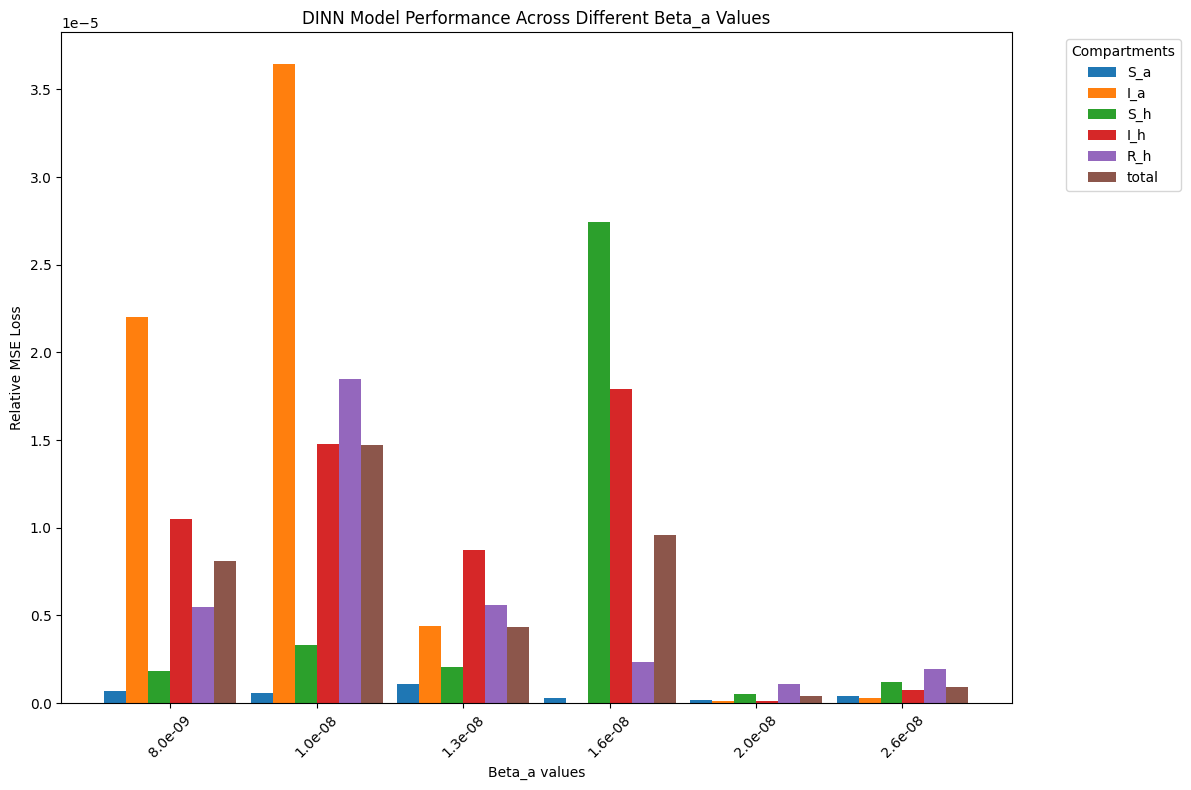


Overall total loss: 0.000006

The loss comparison plot has been saved as 'DINN_losses_comparison.png'


In [132]:
import numpy as np
from scipy import stats

class DINN(nn.Module):
    def __init__(self, t, S_a_data, I_a_data, S_h_data, I_h_data, R_h_data, beta_a_init):
        super(DINN, self).__init__()
        
        self.epsilon = 1e-8
        
        # Convert input data to float32
        self.t = torch.tensor(t, dtype=torch.float32, requires_grad=True)
        self.t_float = self.t.float()
        self.t_batch = torch.reshape(self.t_float, (len(self.t),1))
        
        self.S_a = torch.tensor(S_a_data, dtype=torch.float32)
        self.I_a = torch.tensor(I_a_data, dtype=torch.float32)
        self.S_h = torch.tensor(S_h_data, dtype=torch.float32)
        self.I_h = torch.tensor(I_h_data, dtype=torch.float32)
        self.R_h = torch.tensor(R_h_data, dtype=torch.float32)

        self.losses = [] # here I saved the model's losses per epoch
        
        #setting the parameters
        self.r_a_tilda = torch.nn.Parameter(torch.rand(1, requires_grad=True))
        self.K_a_tilda = torch.nn.Parameter(torch.rand(1, requires_grad=True))
        self.mu_a_tilda = torch.nn.Parameter(torch.rand(1, requires_grad=True))
        self.delta_a_tilda = torch.nn.Parameter(torch.rand(1, requires_grad=True))
        self.Pi_h_tilda = torch.nn.Parameter(torch.rand(1, requires_grad=True))
        self.beta_h_tilda = torch.nn.Parameter(torch.rand(1, requires_grad=True))
        # self.beta_a_tilda = torch.nn.Parameter(torch.rand(1, requires_grad=True))
        self.beta_a_tilda = torch.nn.Parameter(torch.atanh((torch.tensor(beta_a_init) - 0.000000017) / 0.000000019), requires_grad=True)
        self.mu_h_tilda = torch.nn.Parameter(torch.rand(1, requires_grad=True))
        self.delta_h_tilda = torch.nn.Parameter(torch.rand(1, requires_grad=True))
        self.b_tilda = torch.nn.Parameter(torch.rand(1, requires_grad=True))
        self.c_tilda = torch.nn.Parameter(torch.rand(1, requires_grad=True))
        self.gamma_tilda = torch.nn.Parameter(torch.rand(1, requires_grad=True))
        
        #find values for normalization
        self.S_a_max = max(self.S_a)
        self.I_a_max = max(self.I_a)
        self.S_h_max = max(self.S_h)
        self.I_h_max = max(self.I_h)
        self.R_h_max = max(self.R_h)
        self.S_a_min = min(self.S_a)
        self.I_a_min = min(self.I_a)
        self.S_h_min = min(self.S_h)
        self.I_h_min = min(self.I_h)
        self.R_h_min = min(self.R_h)

        #normalize
        self.S_a_hat = (self.S_a - self.S_a_min) / (self.S_a_max - self.S_a_min + self.epsilon)
        self.I_a_hat = (self.I_a - self.I_a_min) / (self.I_a_max - self.I_a_min + self.epsilon)
        self.S_h_hat = (self.S_h - self.S_h_min) / (self.S_h_max - self.S_h_min + self.epsilon)
        self.I_h_hat = (self.I_h - self.I_h_min) / (self.I_h_max - self.I_h_min + self.epsilon)
        self.R_h_hat = (self.R_h - self.R_h_min) / (self.R_h_max - self.R_h_min + self.epsilon) 
        
        #matrices (x5 for S_a,I_a,S_h,I_h,R_h) for the gradients
        self.m1 = torch.zeros((len(self.t), 5)); self.m1[:, 0] = 1
        self.m2 = torch.zeros((len(self.t), 5)); self.m2[:, 1] = 1
        self.m3 = torch.zeros((len(self.t), 5)); self.m3[:, 2] = 1
        self.m4 = torch.zeros((len(self.t), 5)); self.m4[:, 3] = 1
        self.m5 = torch.zeros((len(self.t), 5)); self.m5[:, 4] = 1
        
        #NN
        self.net_si_sir = self.Net_si_sir()
        self.params = list(self.net_si_sir.parameters())
        self.params.extend(list([self.r_a_tilda, self.K_a_tilda, self.mu_a_tilda, self.delta_a_tilda, self.Pi_h_tilda, self.beta_h_tilda, self.beta_a_tilda, self.mu_h_tilda, self.delta_h_tilda, self.b_tilda, self.c_tilda, self.gamma_tilda]))
        
    #force parameters to be in the range of (-1, 1)

    @property
    def r_a(self):
        return torch.tanh(self.r_a_tilda) * 0.01 + 0.005  # Range: [0.0045, 0.0055]    

    @property
    def K_a(self):
        return torch.tanh(self.K_a_tilda) * 100000 + 50000  # Range: [0, 100000]    

    @property
    def mu_a(self):
        return torch.tanh(self.mu_a_tilda) * 0.0001 + 0.0003  # Range: [0.0002, 0.0004]    

    @property
    def delta_a(self):
        return torch.tanh(self.delta_a_tilda) * 0.0001 + 0.0004  # Range: [0.0003, 0.0005]    

    @property
    def Pi_h(self):
        return torch.tanh(self.Pi_h_tilda) * 100 + 30  # Range: [-70, 130]    

    @property
    def beta_h(self):
        return torch.tanh(self.beta_h_tilda) * 0.0000002 + 0.0000008  # Range: [0.0000006, 0.000001]    

    @property
    def beta_a(self):
        # Range to accommodate all beta_a values: [0.8e-8, 1.0e-8, 1.3e-8, 1.6e-8, 2.0e-8, 2.6e-8]
        return torch.tanh(self.beta_a_tilda) * 0.000000019 + 0.000000017  # Range: [0.8e-8, 2.6e-8]    

    @property
    def mu_h(self):
        return torch.tanh(self.mu_h_tilda) * 0.00001 + 0.000039  # Range: [0.000029, 0.000049]    

    @property
    def delta_h(self):
        return torch.tanh(self.delta_h_tilda) * 0.02 + 0.07  # Range: [0.05, 0.09]    

    @property
    def b(self):
        return torch.tanh(self.b_tilda) * 0.002 + 0.001  # Range: [-0.001, 0.003]    

    @property
    def c(self):
        return torch.tanh(self.c_tilda) * 0.02 + 0.01  # Range: [-0.01, 0.03]    

    @property
    def gamma(self):
        return torch.tanh(self.gamma_tilda) * 0.3 + 0.15  # Range: [-0.15, 0.45]



    class Net_si_sir(nn.Module): # input = [[t1], [t2]...[t100]] -- that is, a batch of timesteps 
        def __init__(self):
            super(DINN.Net_si_sir, self).__init__()

            self.fc1=nn.Linear(1, 64) #takes 100 t's
            self.fc2=nn.Linear(64, 64)
            self.fc3=nn.Linear(64, 64)
            self.fc4=nn.Linear(64, 64)
            self.fc5=nn.Linear(64, 64)
            self.fc6=nn.Linear(64, 64)
            self.fc7=nn.Linear(64, 64)
            self.fc8=nn.Linear(64, 64)
            self.fc9=nn.Linear(64, 64)
            self.fc10=nn.Linear(64,64)
            self.fc11=nn.Linear(64, 64)
            self.fc12=nn.Linear(64, 64)
            self.out=nn.Linear(64, 5) #outputs S_a, I_a, S_h, I_h, R_h (100 S_a, 100 I_a, 100 S_h, 100 I_h, 100 R_h --- since we have a batch of 100 timesteps)

        def forward(self, t_batch):
            si_sir=F.relu(self.fc1(t_batch))
            si_sir=F.relu(self.fc2(si_sir))
            si_sir=F.relu(self.fc3(si_sir))
            si_sir=F.relu(self.fc4(si_sir))
            si_sir=F.relu(self.fc5(si_sir))
            si_sir=F.relu(self.fc6(si_sir))
            si_sir=F.relu(self.fc7(si_sir))
            si_sir=F.relu(self.fc8(si_sir))
            si_sir=F.relu(self.fc9(si_sir))
            si_sir=F.relu(self.fc10(si_sir))
            si_sir=F.relu(self.fc11(si_sir))
            si_sir=F.relu(self.fc12(si_sir))
            si_sir=self.out(si_sir)
            return si_sir
            
    def net_f(self, t_batch):
        
        #pass the timesteps batch to the neural network
        si_sir_hat = self.net_si_sir(t_batch)
        
        #organize S_a, I_a, S_h, I_h, R_h from the neural network's output -- note that these are normalized values -- hence the "hat" part
        S_a_hat, I_a_hat, S_h_hat, I_h_hat, R_h_hat = si_sir_hat[:,0], si_sir_hat[:,1], si_sir_hat[:,2], si_sir_hat[:,3], si_sir_hat[:,4]
        
        #S_a_t
        si_sir_hat.backward(self.m1, retain_graph=True)
        S_a_hat_t = self.t.grad.clone()
        self.t.grad.zero_()

        #I_a_t
        si_sir_hat.backward(self.m2, retain_graph=True)
        I_a_hat_t = self.t.grad.clone()
        self.t.grad.zero_()

        #S_h_t
        si_sir_hat.backward(self.m3, retain_graph=True)
        S_h_hat_t = self.t.grad.clone()
        self.t.grad.zero_()

        #I_h_t
        si_sir_hat.backward(self.m4, retain_graph=True)
        I_h_hat_t = self.t.grad.clone()
        self.t.grad.zero_()

        #R_h_t
        si_sir_hat.backward(self.m5, retain_graph=True)
        R_h_hat_t = self.t.grad.clone()
        self.t.grad.zero_()

        #unnormalize
        S_a = self.S_a_min + (self.S_a_max - self.S_a_min) * S_a_hat
        I_a = self.I_a_min + (self.I_a_max - self.I_a_min) * I_a_hat
        S_h = self.S_h_min + (self.S_h_max - self.S_h_min) * S_h_hat      
        I_h = self.I_h_min + (self.I_h_max - self.I_h_min) * I_h_hat
        R_h = self.R_h_min + (self.R_h_max - self.R_h_min) * R_h_hat
        
        f1_hat = S_a_hat_t - (self.r_a * S_a * (1 - S_a / (self.K_a + self.epsilon)) - (self.beta_a * I_a * S_a) / (1 + self.b * I_a + self.epsilon)) / (self.S_a_max - self.S_a_min + self.epsilon)
        f2_hat = I_a_hat_t - ((self.beta_a * I_a * S_a) / (1 + self.b * I_a + self.epsilon) - (self.mu_a + self.delta_a) * I_a) / (self.I_a_max - self.I_a_min + self.epsilon)
        f3_hat = S_h_hat_t - (self.Pi_h - (self.beta_h * I_a * S_h) / (1 + self.c * I_h**2 + self.epsilon) - self.mu_h * S_h) / (self.S_h_max - self.S_h_min + self.epsilon)
        f4_hat = I_h_hat_t - ((self.beta_h * I_a * S_h) / (1 + self.c * I_h**2 + self.epsilon) - (self.mu_h + self.delta_h + self.gamma) * I_h) / (self.I_h_max - self.I_h_min + self.epsilon)
        f5_hat = R_h_hat_t - (self.gamma * I_h - self.mu_h * R_h) / (self.R_h_max - self.R_h_min + self.epsilon)
        
        return f1_hat, f2_hat, f3_hat, f4_hat, f5_hat, S_a_hat, I_a_hat, S_h_hat, I_h_hat, R_h_hat
    
    def calculate_relative_mse(true_data, predicted_data):
        mse = np.mean((true_data - predicted_data)**2)
        return mse / np.mean(true_data**2)


        return S_a_pred.detach(), I_a_pred.detach(), S_h_pred.detach(), I_h_pred.detach(), R_h_pred.detach()   


    def train_model(self, n_epochs):
        print('\nstarting training...\n')
        
        for epoch in range(n_epochs):
            # lists to hold the output (maintain only the final epoch)
            S_a_pred_list = []
            I_a_pred_list = []
            S_h_pred_list = []
            I_h_pred_list = []
            R_h_pred_list = []

            # we pass the timesteps batch into net_f
            f1, f2, f3, f4, f5, S_a_pred, I_a_pred, S_h_pred, I_h_pred, R_h_pred = self.net_f(self.t_batch) # net_f outputs f1_hat, f2_hat, f3_hat, f4_hat, f5_hat, S_a_hat, I_a_hat, S_h_hat, I_h_hat, R_h_hat 
                
            self.optimizer.zero_grad() #zero grad
                
            #append the values to plot later (note that we unnormalize them here for plotting)
            S_a_pred_list.append(self.S_a_min + (self.S_a_max - self.S_a_min) * S_a_pred)
            I_a_pred_list.append(self.I_a_min + (self.I_a_max - self.I_a_min) * I_a_pred)
            S_h_pred_list.append(self.S_h_min + (self.S_h_max - self.S_h_min) * S_h_pred)
            I_h_pred_list.append(self.I_h_min + (self.I_h_max - self.I_h_min) * I_h_pred)
            R_h_pred_list.append(self.R_h_min + (self.R_h_max - self.R_h_min) * R_h_pred)

            #calculate the loss --- MSE of the neural networks output and each compartment

            loss = (torch.mean(torch.square(self.S_a_hat - S_a_pred)) + 
                    torch.mean(torch.square(self.I_a_hat - I_a_pred)) + 
                    torch.mean(torch.square(self.S_h_hat - S_h_pred)) + 
                    torch.mean(torch.square(self.I_h_hat - I_h_pred)) + 
                    torch.mean(torch.square(self.R_h_hat - R_h_pred)) + 
                    torch.mean(torch.square(f1)) + 
                    torch.mean(torch.square(f2)) + 
                    torch.mean(torch.square(f3)) + 
                    torch.mean(torch.square(f4)) + 
                    torch.mean(torch.square(f5))
                    ) 
            # Backpropagation and optimization
            loss.backward()
            self.optimizer.step()
            self.scheduler.step()

            # append the loss value (we call "loss.item()" because we just want the value of the loss and not the entire computational graph)
            self.losses.append(loss.item())

            if epoch % 1000 == 0:          
                print('\nEpoch ', epoch)

                # print("Estimated parameters:")
                # print(f"r_a: {dinn.r_a.item():.6f} (goal: 0.005000)")
                # print(f"K_a: {dinn.K_a.item():.1f} (goal: 50000.0)")
                # print(f"mu_a: {dinn.mu_a.item():.8f} (goal: 0.00034246)")
                # print(f"delta_a: {dinn.delta_a.item():.7f} (goal: 0.0004000)")
                # print(f"Pi_h: {dinn.Pi_h.item():.2f} (goal: 30.00)")
                # print(f"beta_h: {dinn.beta_h.item():.10f} (goal: 0.0000008000)")
                # print(f"beta_a: {dinn.beta_a.item():.11f} (goal: 0.000000026)")
                # print(f"mu_h: {dinn.mu_h.item():.8f} (goal: 0.00003910)")
                # print(f"delta_h: {dinn.delta_h.item():.6f} (goal: 0.077000)")
                # print(f"b: {dinn.b.item():.6f} (goal: 0.001000)")
                # print(f"c: {dinn.c.item():.5f} (goal: 0.01000)")
                # print(f"gamma: {dinn.gamma.item():.5f} (goal: 0.10000)")

                # print('#################################') 
        # return S_a_pred_list, I_a_pred_list, S_h_pred_list, I_h_pred_list, R_h_pred_list

                print("Estimated parameters:")
                print(f"r_a: {self.r_a.item():.6f} (goal: 0.005000)")
                print(f"K_a: {self.K_a.item():.1f} (goal: 50000.0)")
                print(f"mu_a: {self.mu_a.item():.8f} (goal: 0.00034246)")
                print(f"delta_a: {self.delta_a.item():.7f} (goal: 0.0004000)")
                print(f"Pi_h: {self.Pi_h.item():.2f} (goal: 30.00)")
                print(f"beta_h: {self.beta_h.item():.10f} (goal: 0.0000008000)")
                print(f"beta_a: {self.beta_a.item():.11f} (goal: 0.000000026)")
                print(f"mu_h: {self.mu_h.item():.8f} (goal: 0.00003910)")
                print(f"delta_h: {self.delta_h.item():.6f} (goal: 0.077000)")
                print(f"b: {self.b.item():.6f} (goal: 0.001000)")
                print(f"c: {self.c.item():.5f} (goal: 0.01000)")
                print(f"gamma: {self.gamma.item():.5f} (goal: 0.10000)")    

                print('#################################') 
                
       
        # After training, return the final predictions
        f1, f2, f3, f4, f5, S_a_pred, I_a_pred, S_h_pred, I_h_pred, R_h_pred = self.net_f(self.t_batch)
     
        # Unnormalize the predictions
        S_a_pred = self.S_a_min + (self.S_a_max - self.S_a_min) * S_a_pred
        I_a_pred = self.I_a_min + (self.I_a_max - self.I_a_min) * I_a_pred
        S_h_pred = self.S_h_min + (self.S_h_max - self.S_h_min) * S_h_pred
        I_h_pred = self.I_h_min + (self.I_h_max - self.I_h_min) * I_h_pred
        R_h_pred = self.R_h_min + (self.R_h_max - self.R_h_min) * R_h_pred   

        return S_a_pred.detach(), I_a_pred.detach(), S_h_pred.detach(), I_h_pred.detach(), R_h_pred.detach()


import numpy as np
import torch
import torch.optim as optim
import matplotlib.pyplot as plt

def train_dinn_for_beta(beta_a_value):
    filename = f'AVIAN_Influenza_beta_a_{beta_a_value:.1e}.csv'
    print(f"Loading data from {filename}")
    avian_data = np.genfromtxt(filename, delimiter=',', skip_header=1).astype(np.float32)
    
    dinn = DINN(avian_data[:, 0], avian_data[:, 1], avian_data[:, 2], avian_data[:, 3], avian_data[:, 4], avian_data[:, 5], beta_a_value)
    
    optimizer = optim.Adam(dinn.params, lr=1e-4)
    dinn.optimizer = optimizer
    scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=1000, gamma=0.9)
    dinn.scheduler = scheduler
    
    if hasattr(dinn, 'train_model'):
        S_a_pred, I_a_pred, S_h_pred, I_h_pred, R_h_pred = dinn.train_model(50000)
    else:
        raise AttributeError("The DINN class does not have a 'train_model' method. Please check the class definition.")
    
    
    
    # Convert predictions to numpy arrays
    S_a_pred = S_a_pred.numpy()
    I_a_pred = I_a_pred.numpy()
    S_h_pred = S_h_pred.numpy()
    I_h_pred = I_h_pred.numpy()
    R_h_pred = R_h_pred.numpy()
    
    # Calculate losses
    S_a_loss = calculate_relative_mse(avian_data[:, 1], S_a_pred)
    I_a_loss = calculate_relative_mse(avian_data[:, 2], I_a_pred)
    S_h_loss = calculate_relative_mse(avian_data[:, 3], S_h_pred)
    I_h_loss = calculate_relative_mse(avian_data[:, 4], I_h_pred)
    R_h_loss = calculate_relative_mse(avian_data[:, 5], R_h_pred)
    
    total_loss = (S_a_loss + I_a_loss + S_h_loss + I_h_loss + R_h_loss) / 5

    losses = {
        'S_a': S_a_loss,
        'I_a': I_a_loss,
        'S_h': S_h_loss,
        'I_h': I_h_loss,
        'R_h': R_h_loss,
        'total': total_loss
    }

    return losses, (S_a_pred, I_a_pred, S_h_pred, I_h_pred, R_h_pred)

# Define beta_a values
beta_a_values_1 = [0.8e-8, 1.0e-8, 1.3e-8]  # R0 < 1
beta_a_values_2 = [1.6e-8, 2.0e-8, 2.6e-8]  # R0 > 1

# Train DINN for each beta_a value and collect losses
results_1 = [train_dinn_for_beta(beta_a) for beta_a in beta_a_values_1]
results_2 = [train_dinn_for_beta(beta_a) for beta_a in beta_a_values_2]

# Combine all results
all_results = results_1 + results_2
all_beta_values = beta_a_values_1 + beta_a_values_2

# Print losses for each beta_a value
for beta_a, (losses, _) in zip(all_beta_values, all_results):
    print(f"\nLosses for beta_a = {beta_a:.1e}:")
    for compartment, loss in losses.items():
        print(f"{compartment}_loss: {loss:.6f}")

# Calculate average losses across all beta_a values
avg_losses = {
    'S_a': np.mean([result[0]['S_a'] for result in all_results]),
    'I_a': np.mean([result[0]['I_a'] for result in all_results]),
    'S_h': np.mean([result[0]['S_h'] for result in all_results]),
    'I_h': np.mean([result[0]['I_h'] for result in all_results]),
    'R_h': np.mean([result[0]['R_h'] for result in all_results]),
    'total': np.mean([result[0]['total'] for result in all_results])
}

print("\nAverage losses across all beta_a values:")
for compartment, loss in avg_losses.items():
    print(f"Average {compartment}_loss: {loss:.6f}")

# Calculate overall total loss
overall_total_loss = np.mean([result[0]['total'] for result in all_results])
print(f"\nOverall total loss: {overall_total_loss:.6f}")


# After calculating all losses, create the plot
plt.figure(figsize=(12, 8))

# Prepare data for plotting
compartments = ['S_a', 'I_a', 'S_h', 'I_h', 'R_h', 'total']
x = np.arange(len(all_beta_values))
width = 0.15  # width of bars

# Plot bars for each compartment
for i, compartment in enumerate(compartments):
    losses = [result[0][compartment] for result in all_results]
    plt.bar(x + i*width, losses, width, label=compartment)

# Customize the plot
plt.xlabel('Beta_a values')
plt.ylabel('Relative MSE Loss')
plt.title('DINN Model Performance Across Different Beta_a Values')
plt.xticks(x + width*2.5, [f'{beta:.1e}' for beta in all_beta_values], rotation=45)
plt.legend(title='Compartments', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Save the plot as an image
plt.savefig('DINN_losses_comparison.png', dpi=300, bbox_inches='tight')

# Display the plot (optional, if you're running this in a Jupyter notebook or similar environment)
plt.show()

# Print overall total loss
print(f"\nOverall total loss: {overall_total_loss:.6f}")

print("\nThe loss comparison plot has been saved as 'DINN_losses_comparison.png'")

Loading data from AVIAN_Influenza_beta_a_8.0e-09.csv

starting training...


Epoch  0
Estimated parameters:
r_a: 0.006552 (goal: 0.005000)
K_a: 110050.8 (goal: 50000.0)
mu_a: 0.00035222 (goal: 0.00034246)
delta_a: 0.0004672 (goal: 0.0004000)
Pi_h: 75.84 (goal: 30.00)
beta_h: 0.0000009142 (goal: 0.0000008000)
beta_a: 0.00000000800 (goal: 0.000000026)
mu_h: 0.00004464 (goal: 0.00003910)
delta_h: 0.071384 (goal: 0.077000)
b: 0.002049 (goal: 0.001000)
c: 0.01735 (goal: 0.01000)
gamma: 0.37321 (goal: 0.10000)
#################################

Epoch  1000
Estimated parameters:
r_a: 0.005495 (goal: 0.005000)
K_a: 102465.1 (goal: 50000.0)
mu_a: 0.00035543 (goal: 0.00034246)
delta_a: 0.0004694 (goal: 0.0004000)
Pi_h: 71.67 (goal: 30.00)
beta_h: 0.0000009135 (goal: 0.0000008000)
beta_a: 0.00000000738 (goal: 0.000000026)
mu_h: 0.00004482 (goal: 0.00003910)
delta_h: 0.071931 (goal: 0.077000)
b: 0.002064 (goal: 0.001000)
c: 0.01752 (goal: 0.01000)
gamma: 0.37678 (goal: 0.10000)
###################

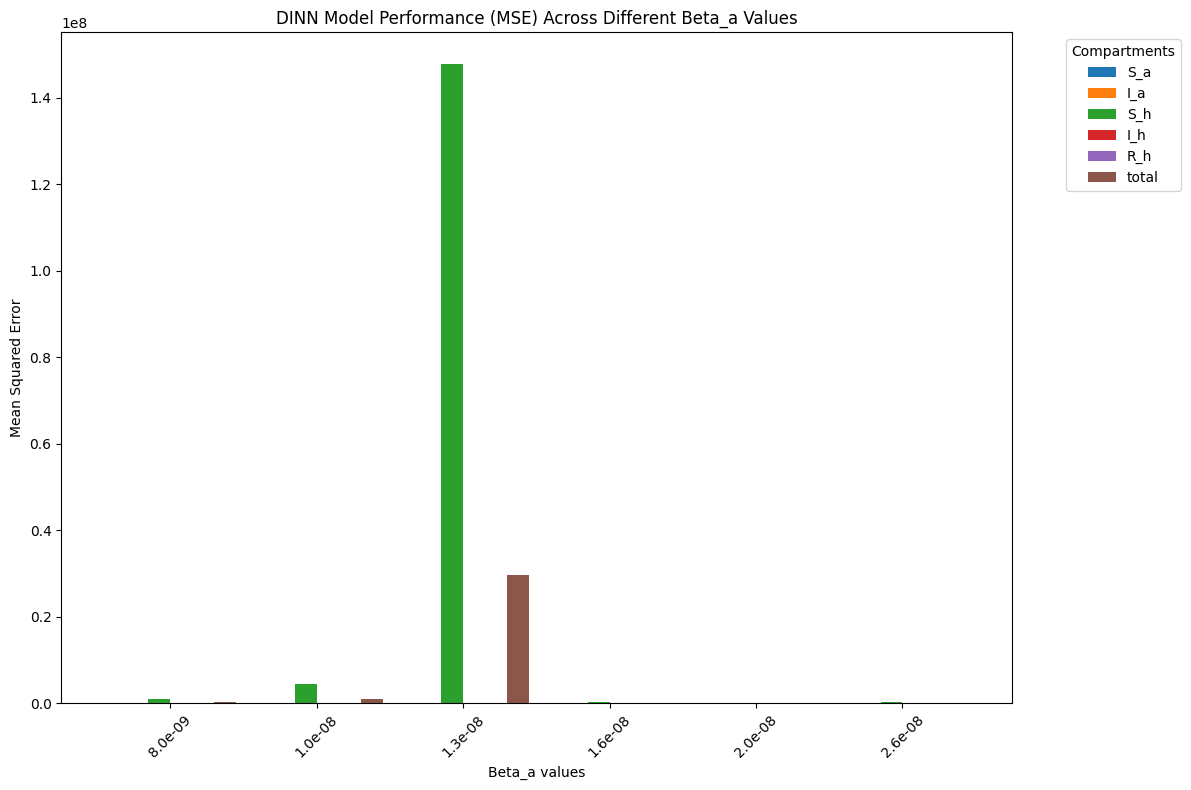

In [134]:
import numpy as np
from scipy import stats

class DINN(nn.Module):
    def __init__(self, t, S_a_data, I_a_data, S_h_data, I_h_data, R_h_data, beta_a_init):
        super(DINN, self).__init__()
        
        self.epsilon = 1e-8
        
        # Convert input data to float32
        self.t = torch.tensor(t, dtype=torch.float32, requires_grad=True)
        self.t_float = self.t.float()
        self.t_batch = torch.reshape(self.t_float, (len(self.t),1))
        
        self.S_a = torch.tensor(S_a_data, dtype=torch.float32)
        self.I_a = torch.tensor(I_a_data, dtype=torch.float32)
        self.S_h = torch.tensor(S_h_data, dtype=torch.float32)
        self.I_h = torch.tensor(I_h_data, dtype=torch.float32)
        self.R_h = torch.tensor(R_h_data, dtype=torch.float32)

        self.losses = [] # here I saved the model's losses per epoch
        
        #setting the parameters
        self.r_a_tilda = torch.nn.Parameter(torch.rand(1, requires_grad=True))
        self.K_a_tilda = torch.nn.Parameter(torch.rand(1, requires_grad=True))
        self.mu_a_tilda = torch.nn.Parameter(torch.rand(1, requires_grad=True))
        self.delta_a_tilda = torch.nn.Parameter(torch.rand(1, requires_grad=True))
        self.Pi_h_tilda = torch.nn.Parameter(torch.rand(1, requires_grad=True))
        self.beta_h_tilda = torch.nn.Parameter(torch.rand(1, requires_grad=True))
        # self.beta_a_tilda = torch.nn.Parameter(torch.rand(1, requires_grad=True))
        self.beta_a_tilda = torch.nn.Parameter(torch.atanh((torch.tensor(beta_a_init) - 0.000000017) / 0.000000019), requires_grad=True)
        self.mu_h_tilda = torch.nn.Parameter(torch.rand(1, requires_grad=True))
        self.delta_h_tilda = torch.nn.Parameter(torch.rand(1, requires_grad=True))
        self.b_tilda = torch.nn.Parameter(torch.rand(1, requires_grad=True))
        self.c_tilda = torch.nn.Parameter(torch.rand(1, requires_grad=True))
        self.gamma_tilda = torch.nn.Parameter(torch.rand(1, requires_grad=True))
        
        #find values for normalization
        self.S_a_max = max(self.S_a)
        self.I_a_max = max(self.I_a)
        self.S_h_max = max(self.S_h)
        self.I_h_max = max(self.I_h)
        self.R_h_max = max(self.R_h)
        self.S_a_min = min(self.S_a)
        self.I_a_min = min(self.I_a)
        self.S_h_min = min(self.S_h)
        self.I_h_min = min(self.I_h)
        self.R_h_min = min(self.R_h)

        #normalize
        self.S_a_hat = (self.S_a - self.S_a_min) / (self.S_a_max - self.S_a_min + self.epsilon)
        self.I_a_hat = (self.I_a - self.I_a_min) / (self.I_a_max - self.I_a_min + self.epsilon)
        self.S_h_hat = (self.S_h - self.S_h_min) / (self.S_h_max - self.S_h_min + self.epsilon)
        self.I_h_hat = (self.I_h - self.I_h_min) / (self.I_h_max - self.I_h_min + self.epsilon)
        self.R_h_hat = (self.R_h - self.R_h_min) / (self.R_h_max - self.R_h_min + self.epsilon) 
        
        #matrices (x5 for S_a,I_a,S_h,I_h,R_h) for the gradients
        self.m1 = torch.zeros((len(self.t), 5)); self.m1[:, 0] = 1
        self.m2 = torch.zeros((len(self.t), 5)); self.m2[:, 1] = 1
        self.m3 = torch.zeros((len(self.t), 5)); self.m3[:, 2] = 1
        self.m4 = torch.zeros((len(self.t), 5)); self.m4[:, 3] = 1
        self.m5 = torch.zeros((len(self.t), 5)); self.m5[:, 4] = 1
        
        #NN
        self.net_si_sir = self.Net_si_sir()
        self.params = list(self.net_si_sir.parameters())
        self.params.extend(list([self.r_a_tilda, self.K_a_tilda, self.mu_a_tilda, self.delta_a_tilda, self.Pi_h_tilda, self.beta_h_tilda, self.beta_a_tilda, self.mu_h_tilda, self.delta_h_tilda, self.b_tilda, self.c_tilda, self.gamma_tilda]))
        
    #force parameters to be in the range of (-1, 1)

    @property
    def r_a(self):
        return torch.tanh(self.r_a_tilda) * 0.01 + 0.005  # Range: [0.0045, 0.0055]    

    @property
    def K_a(self):
        return torch.tanh(self.K_a_tilda) * 100000 + 50000  # Range: [0, 100000]    

    @property
    def mu_a(self):
        return torch.tanh(self.mu_a_tilda) * 0.0001 + 0.0003  # Range: [0.0002, 0.0004]    

    @property
    def delta_a(self):
        return torch.tanh(self.delta_a_tilda) * 0.0001 + 0.0004  # Range: [0.0003, 0.0005]    

    @property
    def Pi_h(self):
        return torch.tanh(self.Pi_h_tilda) * 100 + 30  # Range: [-70, 130]    

    @property
    def beta_h(self):
        return torch.tanh(self.beta_h_tilda) * 0.0000002 + 0.0000008  # Range: [0.0000006, 0.000001]    

    @property
    def beta_a(self):
        # Range to accommodate all beta_a values: [0.8e-8, 1.0e-8, 1.3e-8, 1.6e-8, 2.0e-8, 2.6e-8]
        return torch.tanh(self.beta_a_tilda) * 0.000000019 + 0.000000017  # Range: [0.8e-8, 2.6e-8]    

    @property
    def mu_h(self):
        return torch.tanh(self.mu_h_tilda) * 0.00001 + 0.000039  # Range: [0.000029, 0.000049]    

    @property
    def delta_h(self):
        return torch.tanh(self.delta_h_tilda) * 0.02 + 0.07  # Range: [0.05, 0.09]    

    @property
    def b(self):
        return torch.tanh(self.b_tilda) * 0.002 + 0.001  # Range: [-0.001, 0.003]    

    @property
    def c(self):
        return torch.tanh(self.c_tilda) * 0.02 + 0.01  # Range: [-0.01, 0.03]    

    @property
    def gamma(self):
        return torch.tanh(self.gamma_tilda) * 0.3 + 0.15  # Range: [-0.15, 0.45]



    class Net_si_sir(nn.Module): # input = [[t1], [t2]...[t100]] -- that is, a batch of timesteps 
        def __init__(self):
            super(DINN.Net_si_sir, self).__init__()

            self.fc1=nn.Linear(1, 64) #takes 100 t's
            self.fc2=nn.Linear(64, 64)
            self.fc3=nn.Linear(64, 64)
            self.fc4=nn.Linear(64, 64)
            self.fc5=nn.Linear(64, 64)
            self.fc6=nn.Linear(64, 64)
            self.fc7=nn.Linear(64, 64)
            self.fc8=nn.Linear(64, 64)
            self.fc9=nn.Linear(64, 64)
            self.fc10=nn.Linear(64,64)
            self.fc11=nn.Linear(64, 64)
            self.fc12=nn.Linear(64, 64)
            self.out=nn.Linear(64, 5) #outputs S_a, I_a, S_h, I_h, R_h (100 S_a, 100 I_a, 100 S_h, 100 I_h, 100 R_h --- since we have a batch of 100 timesteps)

        def forward(self, t_batch):
            si_sir=F.relu(self.fc1(t_batch))
            si_sir=F.relu(self.fc2(si_sir))
            si_sir=F.relu(self.fc3(si_sir))
            si_sir=F.relu(self.fc4(si_sir))
            si_sir=F.relu(self.fc5(si_sir))
            si_sir=F.relu(self.fc6(si_sir))
            si_sir=F.relu(self.fc7(si_sir))
            si_sir=F.relu(self.fc8(si_sir))
            si_sir=F.relu(self.fc9(si_sir))
            si_sir=F.relu(self.fc10(si_sir))
            si_sir=F.relu(self.fc11(si_sir))
            si_sir=F.relu(self.fc12(si_sir))
            si_sir=self.out(si_sir)
            return si_sir
            
    def net_f(self, t_batch):
        
        #pass the timesteps batch to the neural network
        si_sir_hat = self.net_si_sir(t_batch)
        
        #organize S_a, I_a, S_h, I_h, R_h from the neural network's output -- note that these are normalized values -- hence the "hat" part
        S_a_hat, I_a_hat, S_h_hat, I_h_hat, R_h_hat = si_sir_hat[:,0], si_sir_hat[:,1], si_sir_hat[:,2], si_sir_hat[:,3], si_sir_hat[:,4]
        
        #S_a_t
        si_sir_hat.backward(self.m1, retain_graph=True)
        S_a_hat_t = self.t.grad.clone()
        self.t.grad.zero_()

        #I_a_t
        si_sir_hat.backward(self.m2, retain_graph=True)
        I_a_hat_t = self.t.grad.clone()
        self.t.grad.zero_()

        #S_h_t
        si_sir_hat.backward(self.m3, retain_graph=True)
        S_h_hat_t = self.t.grad.clone()
        self.t.grad.zero_()

        #I_h_t
        si_sir_hat.backward(self.m4, retain_graph=True)
        I_h_hat_t = self.t.grad.clone()
        self.t.grad.zero_()

        #R_h_t
        si_sir_hat.backward(self.m5, retain_graph=True)
        R_h_hat_t = self.t.grad.clone()
        self.t.grad.zero_()

        #unnormalize
        S_a = self.S_a_min + (self.S_a_max - self.S_a_min) * S_a_hat
        I_a = self.I_a_min + (self.I_a_max - self.I_a_min) * I_a_hat
        S_h = self.S_h_min + (self.S_h_max - self.S_h_min) * S_h_hat      
        I_h = self.I_h_min + (self.I_h_max - self.I_h_min) * I_h_hat
        R_h = self.R_h_min + (self.R_h_max - self.R_h_min) * R_h_hat
        
        f1_hat = S_a_hat_t - (self.r_a * S_a * (1 - S_a / (self.K_a + self.epsilon)) - (self.beta_a * I_a * S_a) / (1 + self.b * I_a + self.epsilon)) / (self.S_a_max - self.S_a_min + self.epsilon)
        f2_hat = I_a_hat_t - ((self.beta_a * I_a * S_a) / (1 + self.b * I_a + self.epsilon) - (self.mu_a + self.delta_a) * I_a) / (self.I_a_max - self.I_a_min + self.epsilon)
        f3_hat = S_h_hat_t - (self.Pi_h - (self.beta_h * I_a * S_h) / (1 + self.c * I_h**2 + self.epsilon) - self.mu_h * S_h) / (self.S_h_max - self.S_h_min + self.epsilon)
        f4_hat = I_h_hat_t - ((self.beta_h * I_a * S_h) / (1 + self.c * I_h**2 + self.epsilon) - (self.mu_h + self.delta_h + self.gamma) * I_h) / (self.I_h_max - self.I_h_min + self.epsilon)
        f5_hat = R_h_hat_t - (self.gamma * I_h - self.mu_h * R_h) / (self.R_h_max - self.R_h_min + self.epsilon)
        
        return f1_hat, f2_hat, f3_hat, f4_hat, f5_hat, S_a_hat, I_a_hat, S_h_hat, I_h_hat, R_h_hat
    
    def calculate_relative_mse(true_data, predicted_data):
        mse = np.mean((true_data - predicted_data)**2)
        return mse / np.mean(true_data**2)


        return S_a_pred.detach(), I_a_pred.detach(), S_h_pred.detach(), I_h_pred.detach(), R_h_pred.detach()   


    def train_model(self, n_epochs):
        print('\nstarting training...\n')
        
        for epoch in range(n_epochs):
            # lists to hold the output (maintain only the final epoch)
            S_a_pred_list = []
            I_a_pred_list = []
            S_h_pred_list = []
            I_h_pred_list = []
            R_h_pred_list = []

            # we pass the timesteps batch into net_f
            f1, f2, f3, f4, f5, S_a_pred, I_a_pred, S_h_pred, I_h_pred, R_h_pred = self.net_f(self.t_batch) # net_f outputs f1_hat, f2_hat, f3_hat, f4_hat, f5_hat, S_a_hat, I_a_hat, S_h_hat, I_h_hat, R_h_hat 
                
            self.optimizer.zero_grad() #zero grad
                
            #append the values to plot later (note that we unnormalize them here for plotting)
            S_a_pred_list.append(self.S_a_min + (self.S_a_max - self.S_a_min) * S_a_pred)
            I_a_pred_list.append(self.I_a_min + (self.I_a_max - self.I_a_min) * I_a_pred)
            S_h_pred_list.append(self.S_h_min + (self.S_h_max - self.S_h_min) * S_h_pred)
            I_h_pred_list.append(self.I_h_min + (self.I_h_max - self.I_h_min) * I_h_pred)
            R_h_pred_list.append(self.R_h_min + (self.R_h_max - self.R_h_min) * R_h_pred)

            #calculate the loss --- MSE of the neural networks output and each compartment

            loss = (torch.mean(torch.square(self.S_a_hat - S_a_pred)) + 
                    torch.mean(torch.square(self.I_a_hat - I_a_pred)) + 
                    torch.mean(torch.square(self.S_h_hat - S_h_pred)) + 
                    torch.mean(torch.square(self.I_h_hat - I_h_pred)) + 
                    torch.mean(torch.square(self.R_h_hat - R_h_pred)) + 
                    torch.mean(torch.square(f1)) + 
                    torch.mean(torch.square(f2)) + 
                    torch.mean(torch.square(f3)) + 
                    torch.mean(torch.square(f4)) + 
                    torch.mean(torch.square(f5))
                    ) 
            # Backpropagation and optimization
            loss.backward()
            self.optimizer.step()
            self.scheduler.step()

            # append the loss value (we call "loss.item()" because we just want the value of the loss and not the entire computational graph)
            self.losses.append(loss.item())

            if epoch % 1000 == 0:          
                print('\nEpoch ', epoch)

                # print("Estimated parameters:")
                # print(f"r_a: {dinn.r_a.item():.6f} (goal: 0.005000)")
                # print(f"K_a: {dinn.K_a.item():.1f} (goal: 50000.0)")
                # print(f"mu_a: {dinn.mu_a.item():.8f} (goal: 0.00034246)")
                # print(f"delta_a: {dinn.delta_a.item():.7f} (goal: 0.0004000)")
                # print(f"Pi_h: {dinn.Pi_h.item():.2f} (goal: 30.00)")
                # print(f"beta_h: {dinn.beta_h.item():.10f} (goal: 0.0000008000)")
                # print(f"beta_a: {dinn.beta_a.item():.11f} (goal: 0.000000026)")
                # print(f"mu_h: {dinn.mu_h.item():.8f} (goal: 0.00003910)")
                # print(f"delta_h: {dinn.delta_h.item():.6f} (goal: 0.077000)")
                # print(f"b: {dinn.b.item():.6f} (goal: 0.001000)")
                # print(f"c: {dinn.c.item():.5f} (goal: 0.01000)")
                # print(f"gamma: {dinn.gamma.item():.5f} (goal: 0.10000)")

                # print('#################################') 
        # return S_a_pred_list, I_a_pred_list, S_h_pred_list, I_h_pred_list, R_h_pred_list

                print("Estimated parameters:")
                print(f"r_a: {self.r_a.item():.6f} (goal: 0.005000)")
                print(f"K_a: {self.K_a.item():.1f} (goal: 50000.0)")
                print(f"mu_a: {self.mu_a.item():.8f} (goal: 0.00034246)")
                print(f"delta_a: {self.delta_a.item():.7f} (goal: 0.0004000)")
                print(f"Pi_h: {self.Pi_h.item():.2f} (goal: 30.00)")
                print(f"beta_h: {self.beta_h.item():.10f} (goal: 0.0000008000)")
                print(f"beta_a: {self.beta_a.item():.11f} (goal: 0.000000026)")
                print(f"mu_h: {self.mu_h.item():.8f} (goal: 0.00003910)")
                print(f"delta_h: {self.delta_h.item():.6f} (goal: 0.077000)")
                print(f"b: {self.b.item():.6f} (goal: 0.001000)")
                print(f"c: {self.c.item():.5f} (goal: 0.01000)")
                print(f"gamma: {self.gamma.item():.5f} (goal: 0.10000)")    

                print('#################################') 
                
       
        # After training, return the final predictions
        f1, f2, f3, f4, f5, S_a_pred, I_a_pred, S_h_pred, I_h_pred, R_h_pred = self.net_f(self.t_batch)
     
        # Unnormalize the predictions
        S_a_pred = self.S_a_min + (self.S_a_max - self.S_a_min) * S_a_pred
        I_a_pred = self.I_a_min + (self.I_a_max - self.I_a_min) * I_a_pred
        S_h_pred = self.S_h_min + (self.S_h_max - self.S_h_min) * S_h_pred
        I_h_pred = self.I_h_min + (self.I_h_max - self.I_h_min) * I_h_pred
        R_h_pred = self.R_h_min + (self.R_h_max - self.R_h_min) * R_h_pred   

        return S_a_pred.detach(), I_a_pred.detach(), S_h_pred.detach(), I_h_pred.detach(), R_h_pred.detach()


import numpy as np
import torch
import torch.optim as optim
import matplotlib.pyplot as plt

def train_dinn_for_beta(beta_a_value):
    filename = f'AVIAN_Influenza_beta_a_{beta_a_value:.1e}.csv'
    print(f"Loading data from {filename}")
    avian_data = np.genfromtxt(filename, delimiter=',', skip_header=1).astype(np.float32)
    
    dinn = DINN(avian_data[:, 0], avian_data[:, 1], avian_data[:, 2], avian_data[:, 3], avian_data[:, 4], avian_data[:, 5], beta_a_value)
    
    optimizer = optim.Adam(dinn.params, lr=1e-4)
    dinn.optimizer = optimizer
    scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=1000, gamma=0.9)
    dinn.scheduler = scheduler
    
    if hasattr(dinn, 'train_model'):
        S_a_pred, I_a_pred, S_h_pred, I_h_pred, R_h_pred = dinn.train_model(50000)
    else:
        raise AttributeError("The DINN class does not have a 'train_model' method. Please check the class definition.")
    
    
    
    # Convert predictions to numpy arrays
    S_a_pred = S_a_pred.numpy()
    I_a_pred = I_a_pred.numpy()
    S_h_pred = S_h_pred.numpy()
    I_h_pred = I_h_pred.numpy()
    R_h_pred = R_h_pred.numpy()
    
    # Calculate MSE for each compartment
    mse_S_a = np.mean((avian_data[:, 1] - S_a_pred)**2)
    mse_I_a = np.mean((avian_data[:, 2] - I_a_pred)**2)
    mse_S_h = np.mean((avian_data[:, 3] - S_h_pred)**2)
    mse_I_h = np.mean((avian_data[:, 4] - I_h_pred)**2)
    mse_R_h = np.mean((avian_data[:, 5] - R_h_pred)**2)

    # Calculate total MSE
    mse_total = (mse_S_a + mse_I_a + mse_S_h + mse_I_h + mse_R_h) / 5

    mse_dict = {
        'S_a': mse_S_a,
        'I_a': mse_I_a,
        'S_h': mse_S_h,
        'I_h': mse_I_h,
        'R_h': mse_R_h,
        'total': mse_total
    }

    return mse_dict, (S_a_pred, I_a_pred, S_h_pred, I_h_pred, R_h_pred)

# Define beta_a values
beta_a_values_1 = [0.8e-8, 1.0e-8, 1.3e-8]  # R0 < 1
beta_a_values_2 = [1.6e-8, 2.0e-8, 2.6e-8]  # R0 > 1

# Train DINN for each beta_a value and collect results
results_1 = [train_dinn_for_beta(beta_a) for beta_a in beta_a_values_1]
results_2 = [train_dinn_for_beta(beta_a) for beta_a in beta_a_values_2]

# Combine all results
all_results = results_1 + results_2
all_beta_values = beta_a_values_1 + beta_a_values_2

# Print MSE for each beta_a value
for beta_a, (mse_dict, _) in zip(all_beta_values, all_results):
    print(f"\nMSE for beta_a = {beta_a:.1e}:")
    for compartment, mse in mse_dict.items():
        print(f"{compartment}_MSE: {mse:.6f}")

# Calculate average MSE across all beta_a values
avg_mse = {
    'S_a': np.mean([result[0]['S_a'] for result in all_results]),
    'I_a': np.mean([result[0]['I_a'] for result in all_results]),
    'S_h': np.mean([result[0]['S_h'] for result in all_results]),
    'I_h': np.mean([result[0]['I_h'] for result in all_results]),
    'R_h': np.mean([result[0]['R_h'] for result in all_results]),
    'total': np.mean([result[0]['total'] for result in all_results])
}

print("\nAverage MSE across all beta_a values:")
for compartment, mse in avg_mse.items():
    print(f"Average {compartment}_MSE: {mse:.6f}")

# Calculate overall total MSE
overall_total_mse = np.mean([result[0]['total'] for result in all_results])
print(f"\nOverall total MSE: {overall_total_mse:.6f}")

# Plot MSE for each beta_a value
plt.figure(figsize=(12, 8))
compartments = ['S_a', 'I_a', 'S_h', 'I_h', 'R_h', 'total']
x = np.arange(len(all_beta_values))
width = 0.15

for i, compartment in enumerate(compartments):
    mse_values = [result[0][compartment] for result in all_results]
    plt.bar(x + i*width, mse_values, width, label=compartment)

plt.xlabel('Beta_a values')
plt.ylabel('Mean Squared Error')
plt.title('DINN Model Performance (MSE) Across Different Beta_a Values')
plt.xticks(x + width*2.5, [f'{beta:.1e}' for beta in all_beta_values], rotation=45)
plt.legend(title='Compartments', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('DINN_MSE_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

Text(0, 0.5, 'Loss')

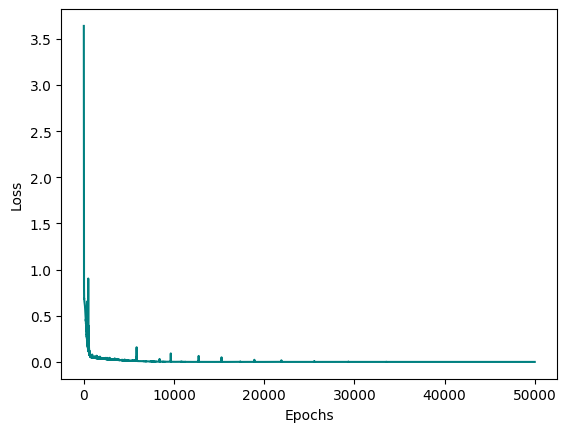

In [149]:
plt.plot(dinn.losses[0:], color = 'teal')
plt.xlabel('Epochs')
plt.ylabel('Loss')